# Exploratory Data Analysis

We will be looking at our water point data and the features of the point. This is in order to better understand what is in our data, explore initial insights and inform what our modelling should be focused on.

# A. Setup

In [3]:
# importing relevant packages and functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages_functions.py

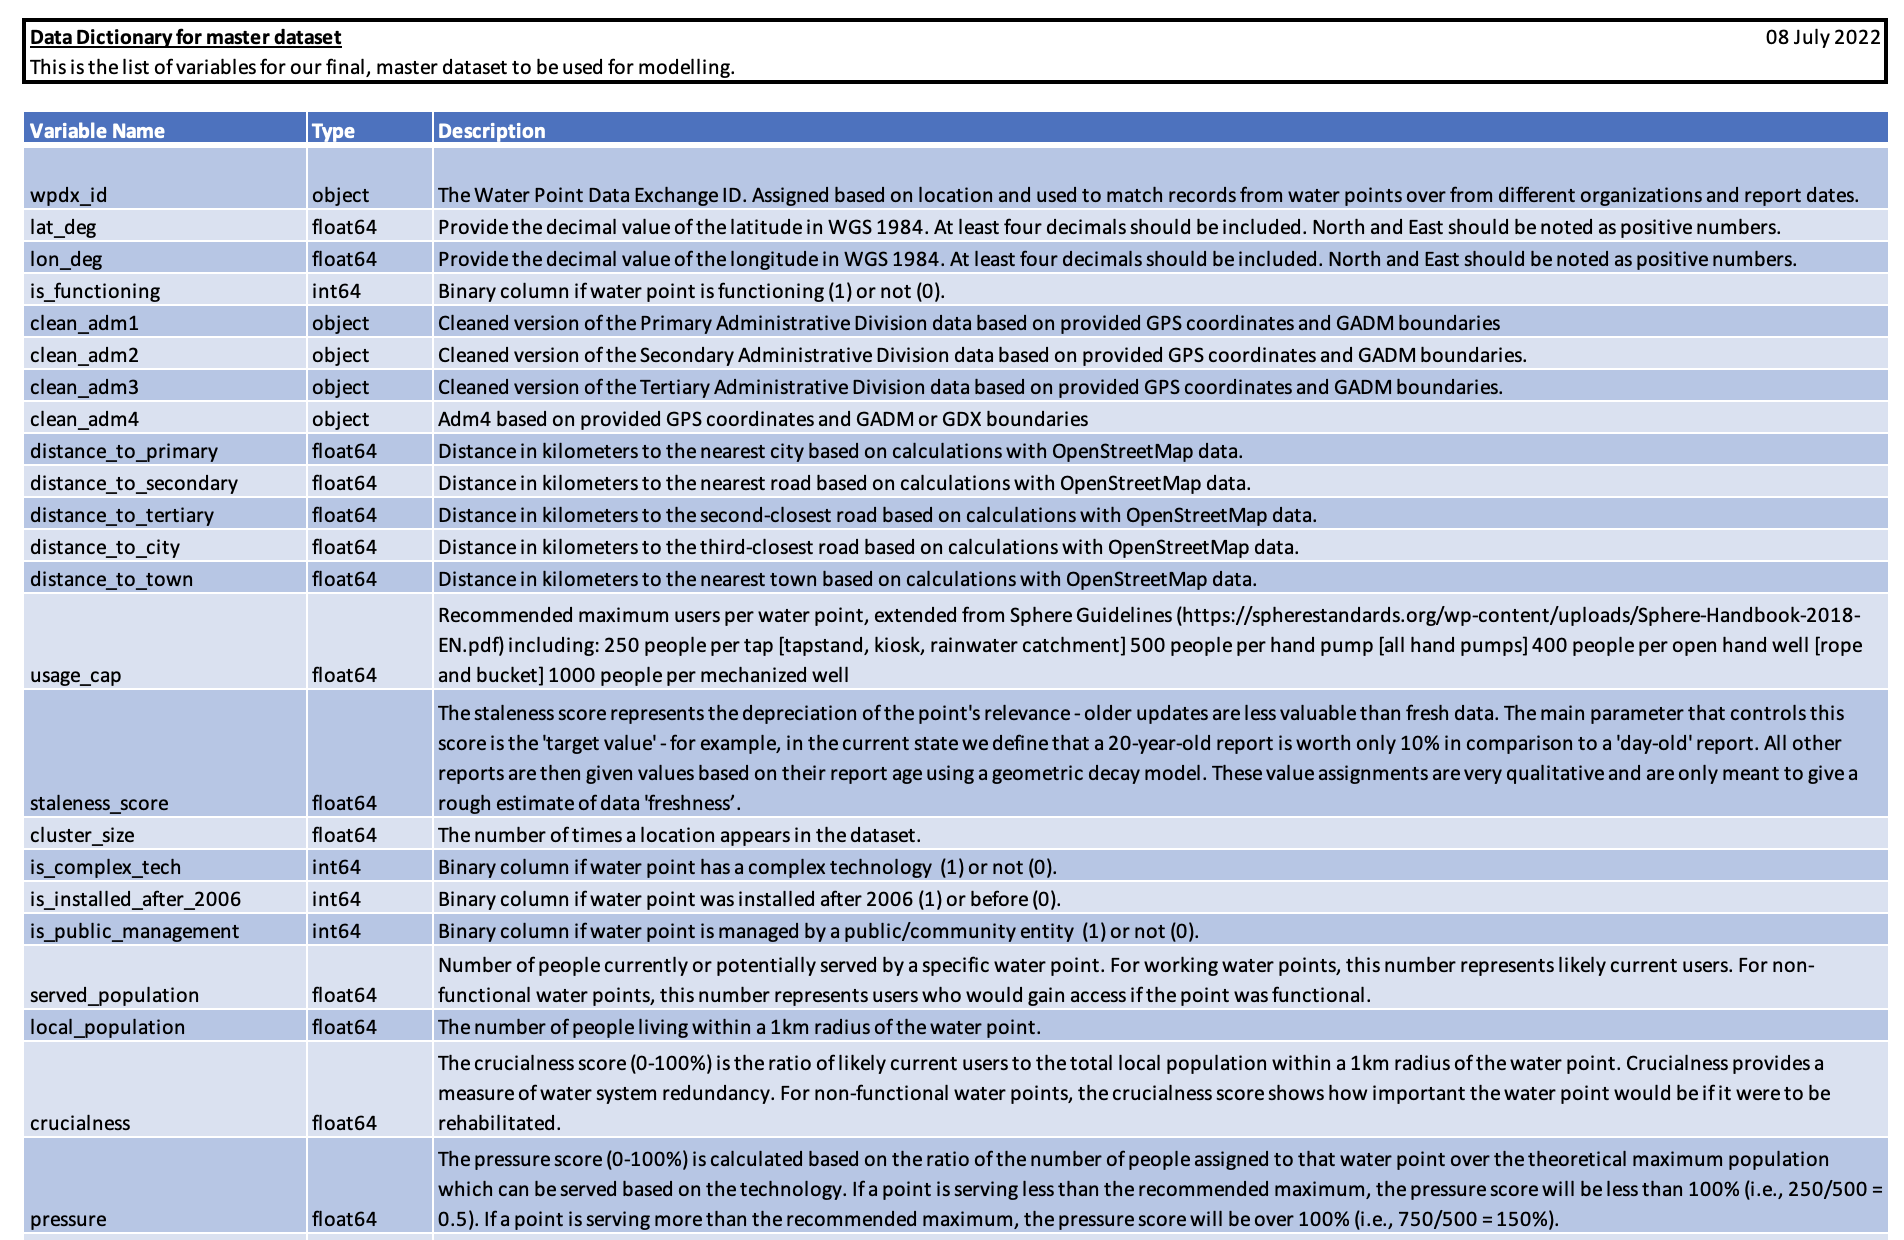

In [4]:
#data dictionary part A
Image(dictionary_filepath+"4A-Master-Dictionary.png")

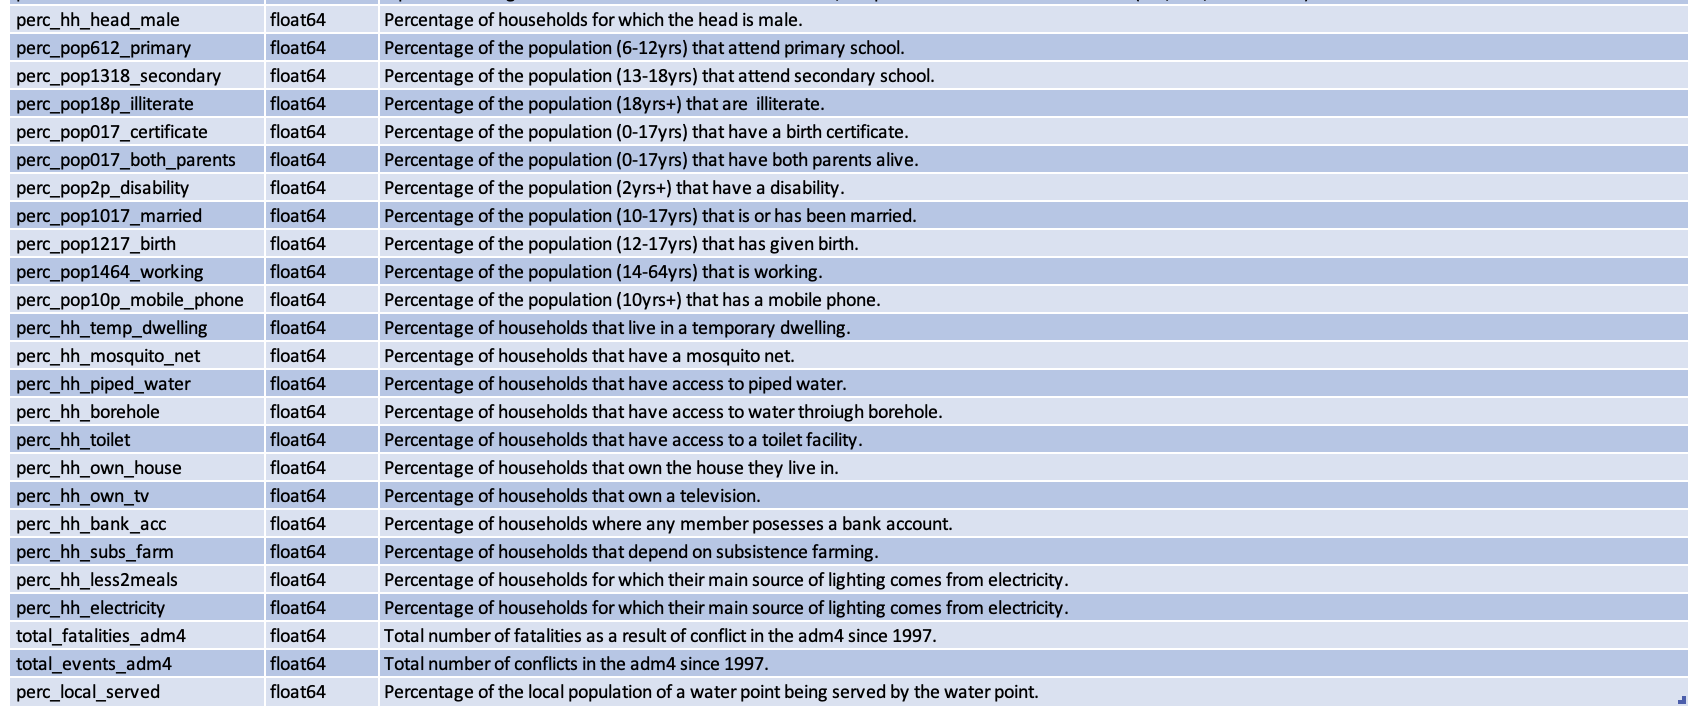

In [5]:
#data dictionary part B
Image(dictionary_filepath+"4B-Master-Dictionary.png")

Now we have a clean dataset, with no duplicate rows/columns, no missing values, all of our columns of interest and all of them in a format fit for analysis. Our outcome (dependent) variable is whether a water point is functioning or not. `is_functioning` is a binary column equal to 1 if that water point was functioning at the time of check, 0 if not.

In [6]:
#water points
master_df_raw=pd.read_csv(data_filepath + 'ta_4_master_df.csv', index_col=0)

#leaving raw dataset untouched

master_df=master_df_raw.copy()

#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107184 entries, 0 to 108905
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   wpdx_id                   106307 non-null  object 
 1   lat_deg                   107184 non-null  float64
 2   lon_deg                   107184 non-null  float64
 3   is_functioning            107184 non-null  int64  
 4   clean_adm1                107184 non-null  object 
 5   clean_adm2                107184 non-null  object 
 6   clean_adm3                107184 non-null  object 
 7   clean_adm4                107184 non-null  object 
 8   distance_to_primary       107184 non-null  float64
 9   distance_to_secondary     107184 non-null  float64
 10  distance_to_tertiary      107184 non-null  float64
 11  distance_to_city          107184 non-null  float64
 12  distance_to_town          107184 non-null  float64
 13  usage_cap                 107184 non-null  f

In [7]:
#summary statistics
round(master_df.describe().T)

count   mean     std   min    25%    50%    75%  \
lat_deg                   107184.0    1.0     1.0  -1.0    0.0    1.0    2.0   
lon_deg                   107184.0   32.0     2.0  30.0   31.0   32.0   33.0   
is_functioning            107184.0    1.0     0.0   0.0    1.0    1.0    1.0   
distance_to_primary       107184.0   17.0    16.0   0.0    4.0   13.0   26.0   
distance_to_secondary     107184.0    5.0     6.0   0.0    1.0    3.0    7.0   
distance_to_tertiary      107184.0    3.0     4.0   0.0    0.0    2.0    4.0   
distance_to_city          107184.0   42.0    31.0   0.0   20.0   36.0   58.0   
distance_to_town          107184.0   16.0    12.0   0.0    7.0   14.0   23.0   
usage_cap                 107184.0  255.0    99.0  50.0  250.0  250.0  300.0   
staleness_score           107184.0   32.0    18.0  14.0   24.0   25.0   30.0   
cluster_size              107184.0    1.0     2.0   1.0    1.0    1.0    1.0   
is_complex_tech           107184.0    0.0     0.0   0.0    0.0    0.0    1.0   
is_installed_after_2006   107184.0    0.0     0.0   0.0    0.0    0.0    1.0   
is_public_management      107184.0    1.0     0.0   0.0    0.0    1.0    1.0   
served_population         107184.0  183.0   450.0   0.0   13.0   72.0  202.0   
local_population          107184.0  725.0  1042.0   0.0  207.0  469.0  862.0   
crucialness               107184.0    0.0     0.0   0.0    0.0    0.0    0.0   
pressure                  107184.0    1.0     3.0   0.0    0.0    0.0    1.0   
perc_hh_head_male         107184.0   77.0     5.0  43.0   74.0   77.0   80.0   
perc_pop612_primary       107184.0   80.0    13.0   6.0   78.0   84.0   87.0   
perc_pop1318_secondary    107184.0   29.0     9.0   3.0   23.0   28.0   35.0   
perc_pop18p_illiterate    107184.0   33.0    13.0   5.0   25.0   32.0   38.0   
perc_pop017_certificate   107184.0   29.0    13.0   2.0   18.0   28.0   37.0   
perc_pop017_both_parents  107184.0   92.0     2.0  81.0   91.0   92.0   93.0   
perc_pop2p_disability     107184.0   13.0     5.0   2.0   10.0   12.0   15.0   
perc_pop1017_married      107184.0    7.0     3.0   1.0    5.0    6.0    8.0   
perc_pop1217_birth        107184.0    9.0     4.0   2.0    6.0    8.0   10.0   
perc_pop1464_working      107184.0   80.0    12.0  15.0   73.0   81.0   89.0   
perc_pop10p_mobile_phone  107184.0   34.0    13.0   2.0   25.0   33.0   40.0   
perc_hh_temp_dwelling     107184.0   28.0    30.0   0.0    4.0   14.0   55.0   
perc_hh_mosquito_net      107184.0   94.0     4.0  62.0   93.0   96.0   97.0   
perc_hh_piped_water       107184.0   12.0    17.0   0.0    1.0    4.0   13.0   
perc_hh_borehole          107184.0   36.0    31.0   0.0    8.0   27.0   62.0   
perc_hh_toilet            107184.0   10.0    16.0   0.0    2.0    4.0   11.0   
perc_hh_own_house         107184.0   82.0    15.0  13.0   77.0   87.0   93.0   
perc_hh_own_tv            107184.0    7.0     9.0   0.0    2.0    3.0    7.0   
perc_hh_bank_acc          107184.0   18.0    10.0   2.0   10.0   14.0   24.0   
perc_hh_subs_farm         107184.0   80.0    19.0   1.0   78.0   87.0   92.0   
perc_hh_less2meals        107184.0   11.0    10.0   2.0    6.0    9.0   12.0   
perc_hh_electricity       107184.0   12.0    12.0   0.0    5.0    8.0   14.0   
total_fatalities_adm4     107184.0    4.0    28.0   0.0    0.0    0.0    0.0   
total_events_adm4         107184.0    2.0     7.0   0.0    0.0    0.0    1.0   
perc_local_served         107184.0   25.0    27.0   0.0    4.0   15.0   36.0   

                              max  
lat_deg                       4.0  
lon_deg                      35.0  
is_functioning                1.0  
distance_to_primary         113.0  
distance_to_secondary        49.0  
distance_to_tertiary         34.0  
distance_to_city            223.0  
distance_to_town             58.0  
usage_cap                  1000.0  
staleness_score             100.0  
cluster_size                 76.0  
is_complex_tech               1.0  
is_installed_after_2006       1.0  
is_p

We will go through every column, and understand the information it contains and how we can use it in our models. We will use the summary statistic table above for every variable.

# B. Distribution of variables

## 1. wpdx_id

In [8]:
#unique water points
unique_water=len(set(master_df['wpdx_id']))
total_observations=len(master_df['wpdx_id'])

print(f"There are {unique_water} unique water points in the dataset.")
print(f"There are {total_observations} reports in the dataset.")
print(f"There are {total_observations-unique_water} water points with more than one report.")

There are 96458 unique water points in the dataset.
There are 107184 reports in the dataset.
There are 10726 water points with more than one report.


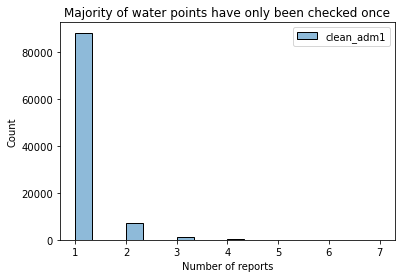

clean_adm1
1             91.39
2              7.30
3              1.04
4              0.28
5              0.00
7              0.00
dtype: float64

In [9]:
#reports by water point
reports_water_pt=master_df[['wpdx_id','clean_adm1' ]].groupby('wpdx_id').count()

#visualise
sns.histplot(reports_water_pt)

plt.title("Majority of water points have only been checked once")

plt.xlabel("Number of reports")

plt.show()

#percentages
round(reports_water_pt.value_counts(normalize=True)*100,2)

Very few water points are checked more than once (only 8% of them). The overarching majority are checked once.

## 2-3. lat_deg & lon_deg

In [10]:
#location of all water points
unique_water_points=master_df.groupby('wpdx_id').mean()

In [11]:
# #visualise water points, choose what variable represents the size of the points
# fig = px.scatter_geo(
#     water_points,
#     lon='lon_deg', lat='lat_deg', 
#     size='served_population', #'crucialness', 'pressure', 'total_fatalities_adm4', 'total_events_adm4 
#     height=600,
#     width=800,
# )

# fig.show()

The visualisation is very intensive and makes our script slow, which is why we have put it as a comment. If a users wants to use it, it should just uncomment the command. This is a tool to see where water points are located. If we zoom in, we can see that the water points are distributed relatively equally around the country. There doesn't seem to be a region which has clearly less water points than other.

## 4. is_functioning

In [12]:
#functioning water points
func_distrib=master_df['is_functioning'].value_counts(normalize=True)*100

print(
    f"The distribution of water points is {round(func_distrib[0],0).astype('int')}% not functioning and {round(func_distrib[1],0).astype('int')}% functioning."
)

The distribution of water points is 20% not functioning and 80% functioning.


This is important for future modelling and whether we want upsample our training datasets to make our model better at recognising not functioning water points.

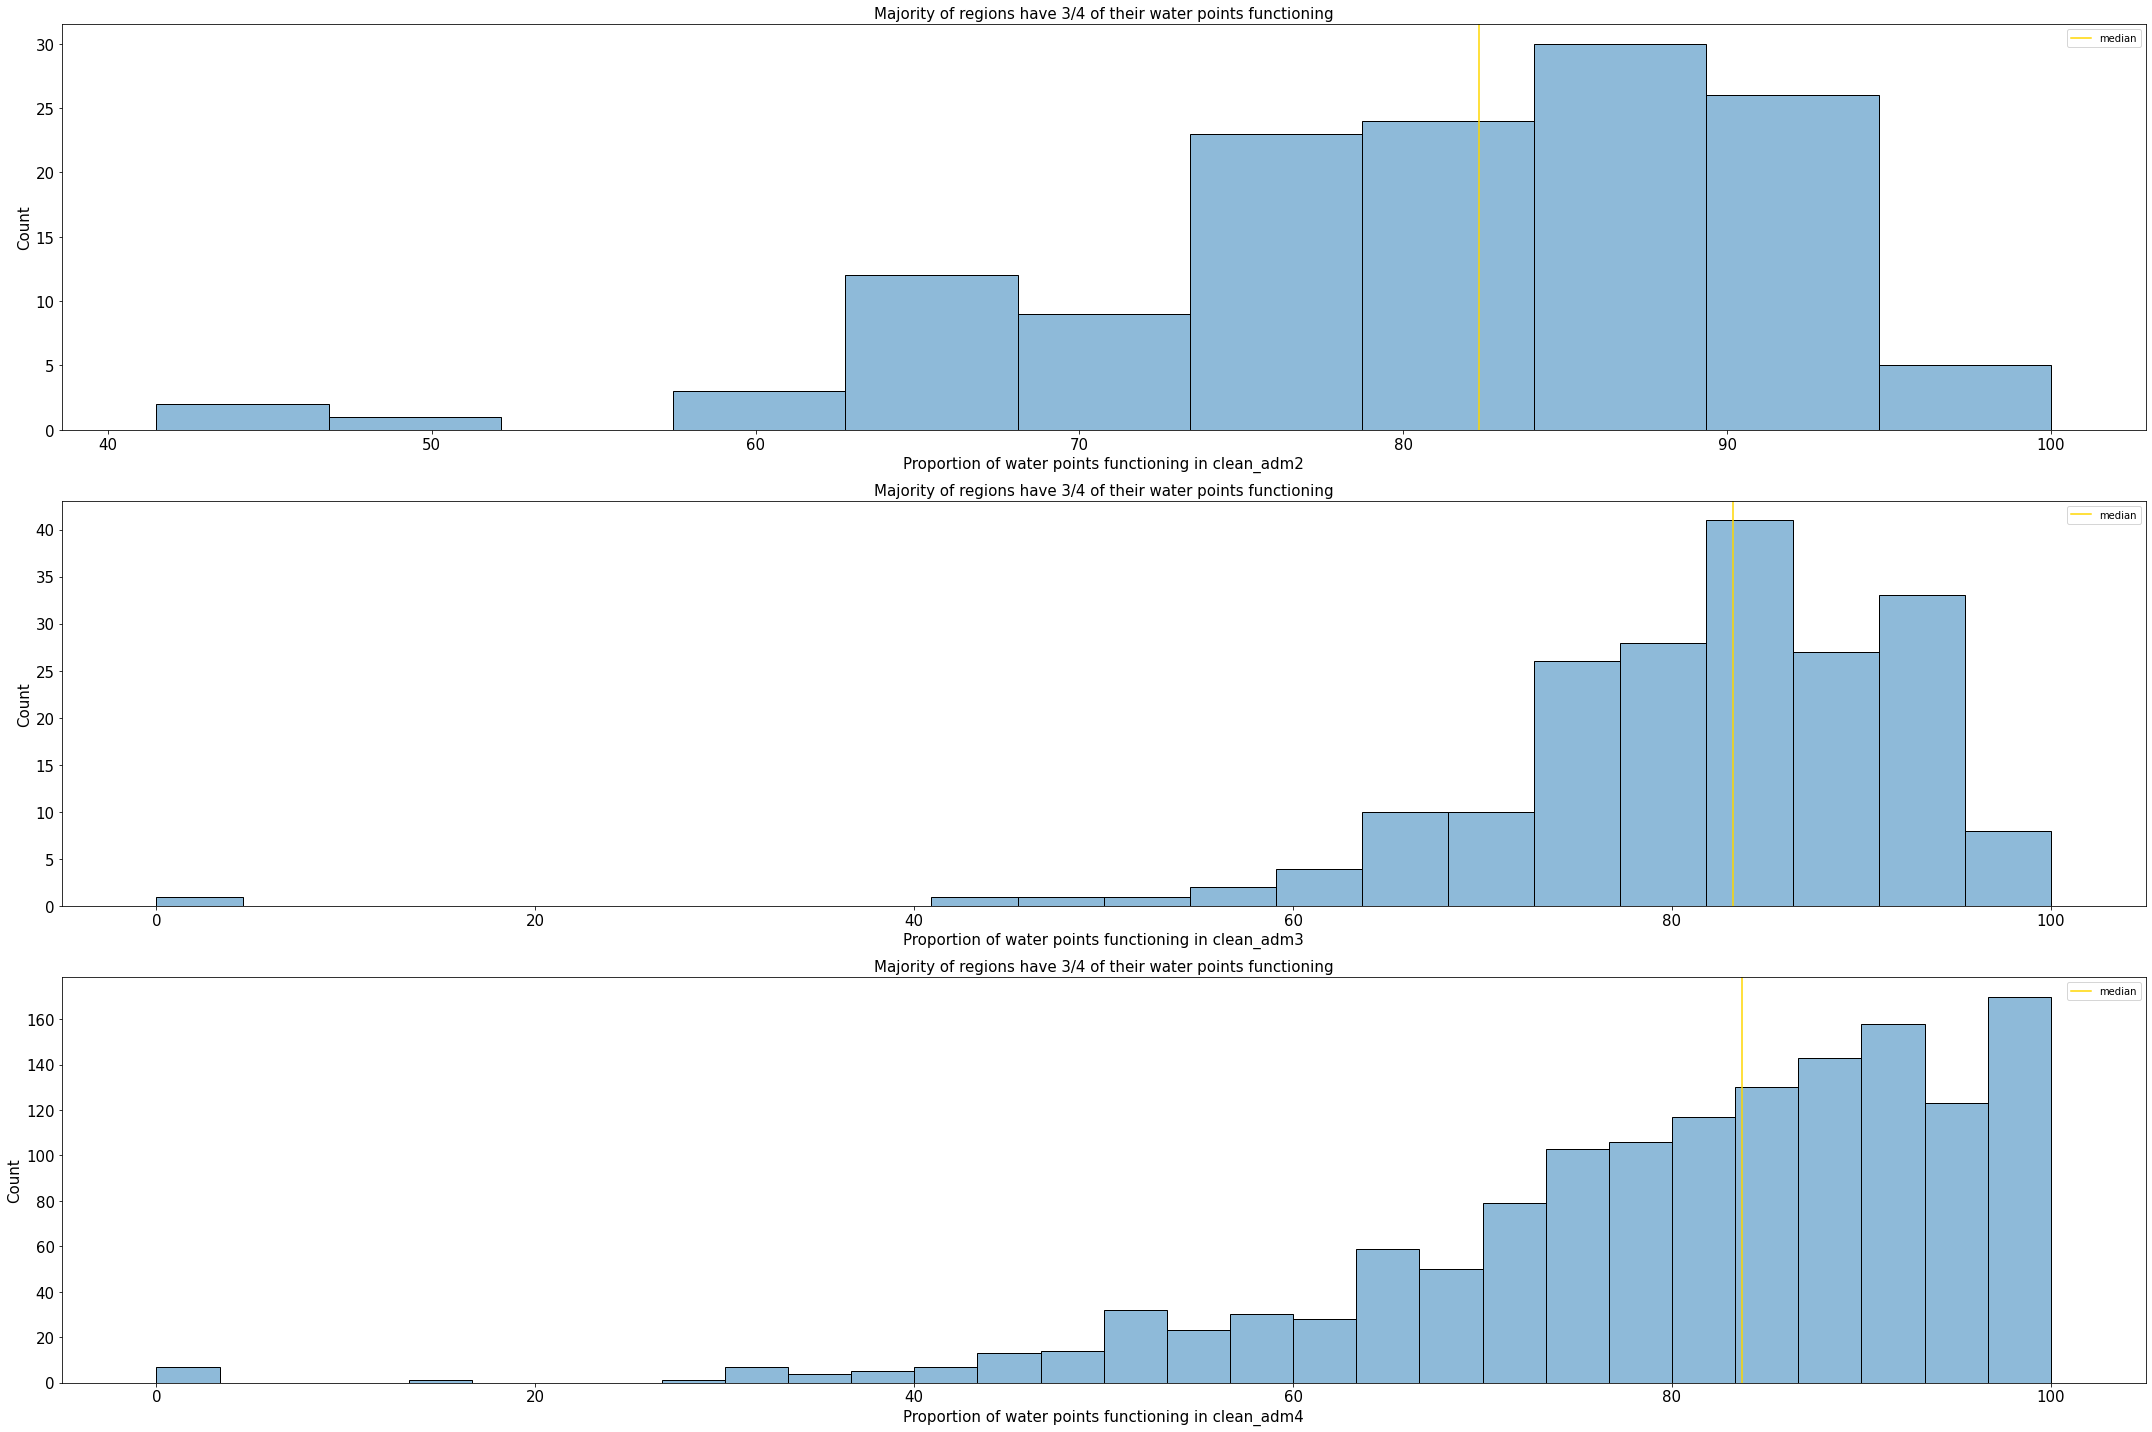

In [13]:
#list of regional level
regions=['clean_adm2', 'clean_adm3', 'clean_adm4']

#visualise through a subplot
plt.subplots(3,1, figsize=(30,20))

for i, adm in enumerate(regions, 1):
    adm_functioning=master_df[[adm,'is_functioning']].groupby(adm).mean()*100
    plt.subplot(3,1,i)

    sns.histplot(adm_functioning)

    plt.xlabel(f"Proportion of water points functioning in {adm}", size=15)
    plt.ylabel('Count', size=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title('Majority of regions have 3/4 of their water points functioning', size=15)

    plt.axvline(adm_functioning['is_functioning'].median(), c='gold', label='median')

    plt.legend()   
plt.tight_layout()
plt.show()


## 5-8. clean_adm

In [15]:
#number of regions
for regions in ['clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4']:   
    print(f"There are {len(set(master_df[regions]))} {regions} regions in our Uganda dataset")

There are 4 clean_adm1 regions in our Uganda dataset
There are 135 clean_adm2 regions in our Uganda dataset
There are 193 clean_adm3 regions in our Uganda dataset
There are 1410 clean_adm4 regions in our Uganda dataset


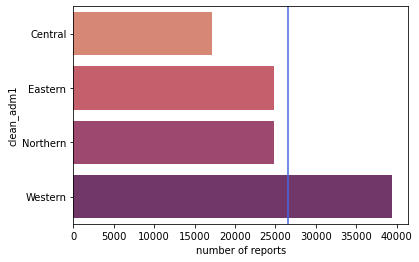

In [16]:
#number of water point reports by region
adm1_reports=master_df[['clean_adm1', 'wpdx_id']].groupby('clean_adm1').count()

#visualise
sns.barplot(data=adm1_reports, y=adm1_reports.index, x=adm1_reports['wpdx_id'], palette="flare")

plt.xlabel('number of reports')

plt.axvline(adm1_reports['wpdx_id'].mean(), c='royalblue', label='mean')

plt.show()


The Western region has much more reports than the other three regions. This is not due to their population size or area as they are all of similar size.

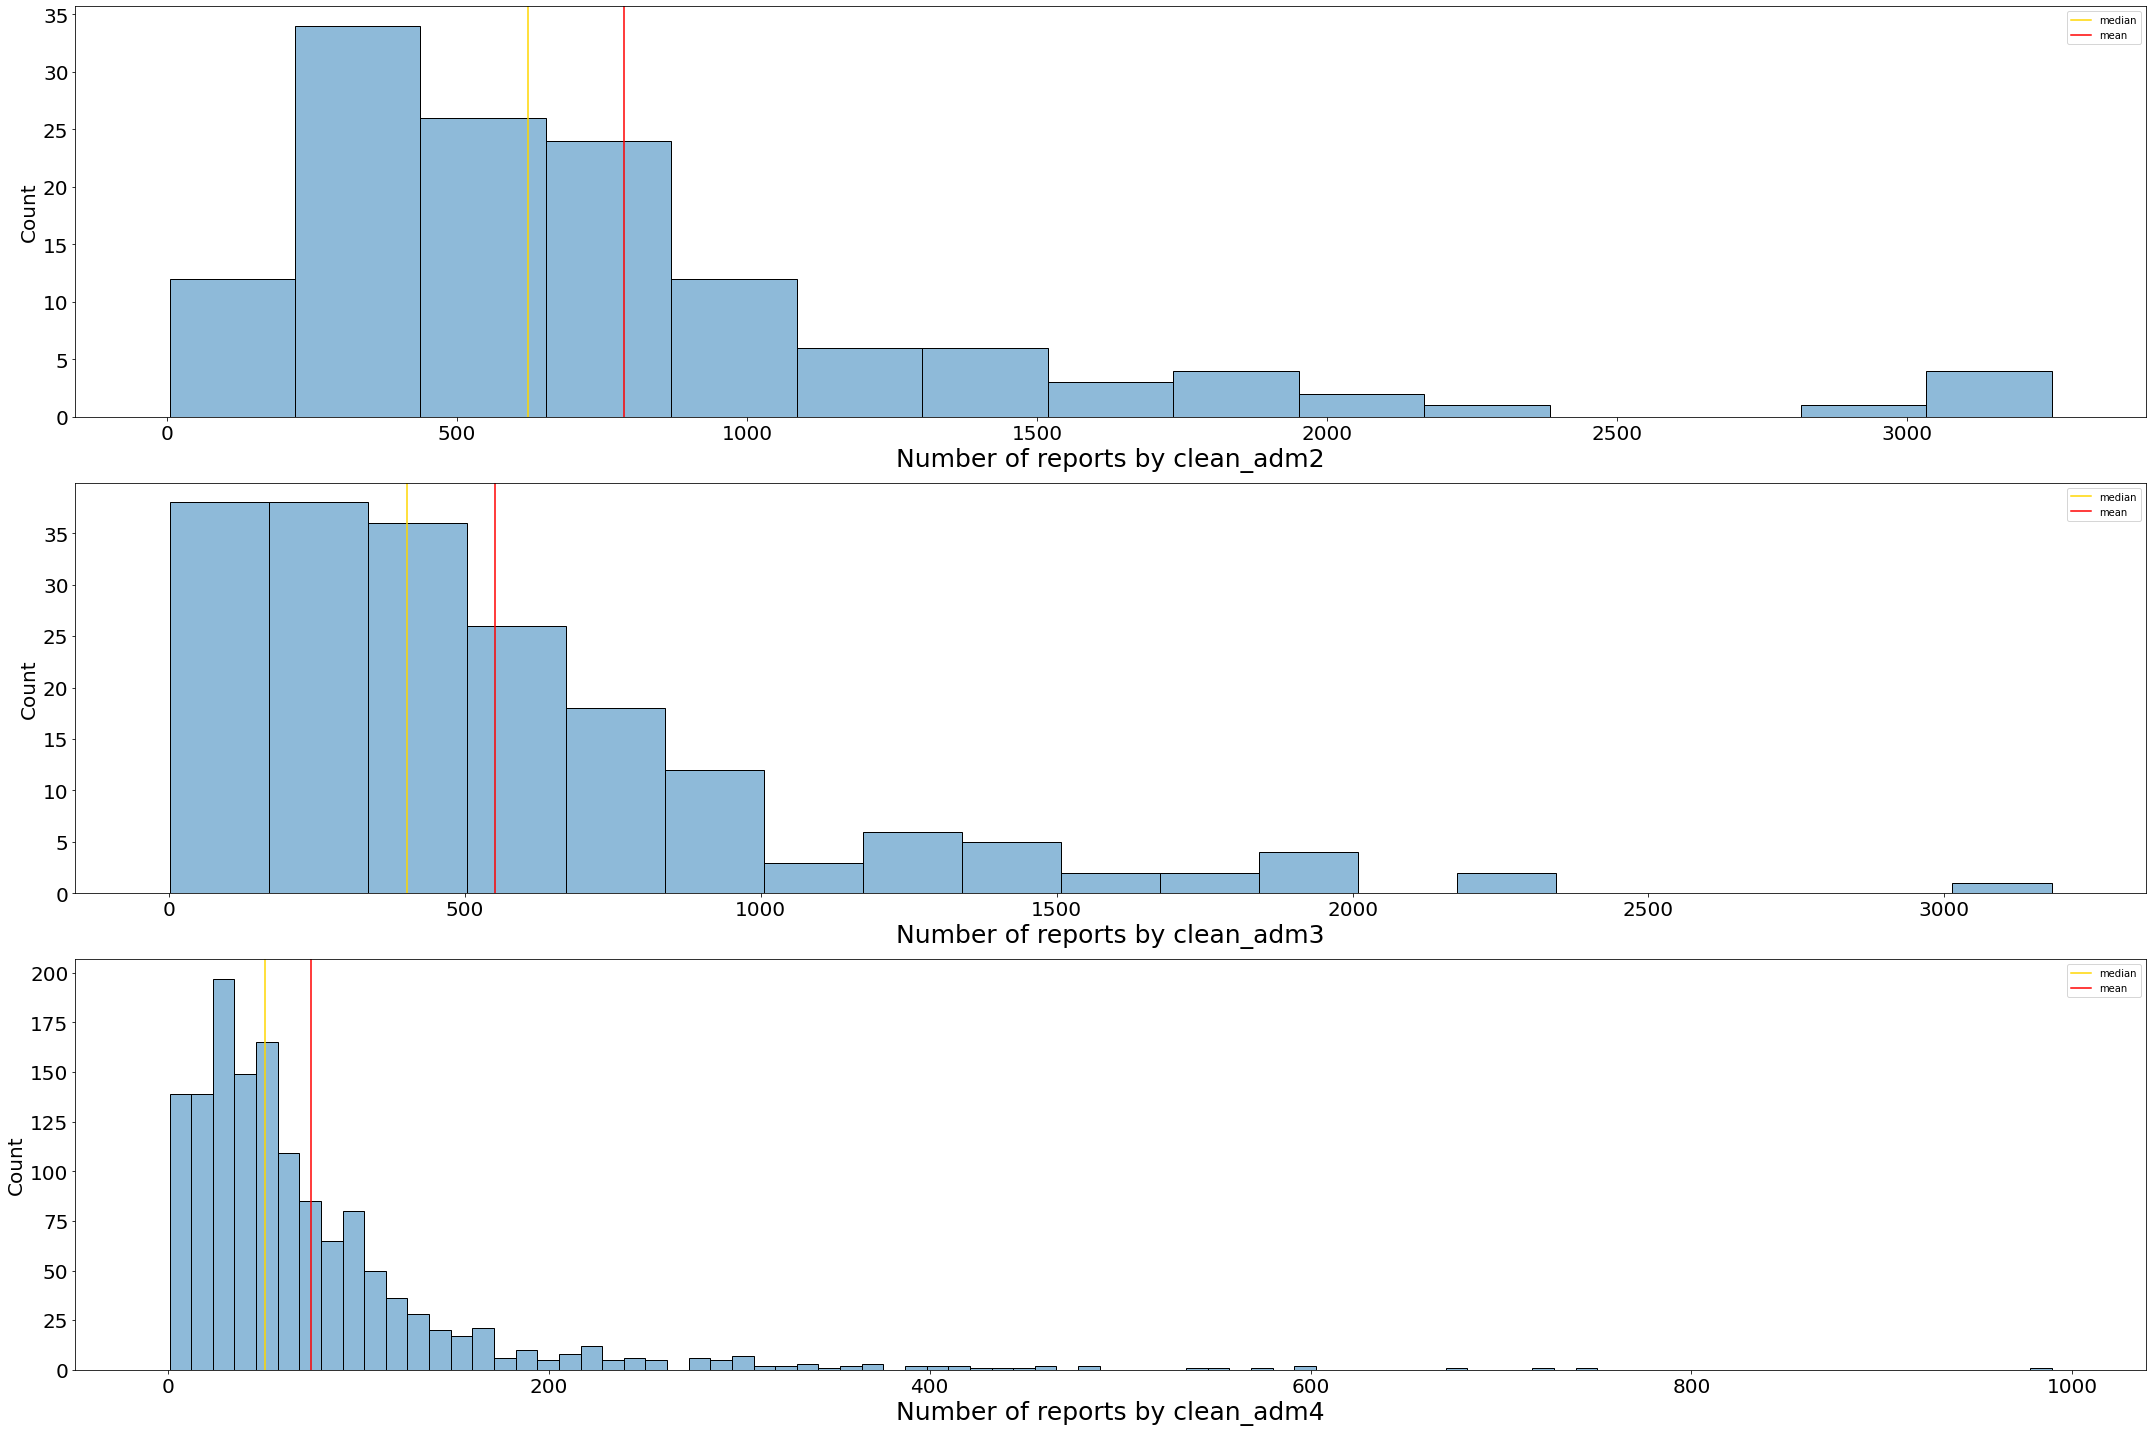

In [17]:
#list of regional level
regions=['clean_adm2', 'clean_adm3', 'clean_adm4']

#visualise through a subplot
plt.subplots(3,1, figsize=(30,20))

for i, adm in enumerate(regions, 1):
    adm_reports=master_df[[adm, 'wpdx_id']].groupby(adm).count()
    plt.subplot(3,1,i)

    sns.histplot(adm_reports)

    
    plt.xlabel(f"Number of reports by {adm}", size=25)
    plt.ylabel('Count', size=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)

    plt.axvline(adm_reports['wpdx_id'].median(), c='gold', label='median')  
    plt.axvline(adm_reports['wpdx_id'].mean(), c='r', label='mean')   

    plt.legend()
    plt.tight_layout()
plt.show()

The median number of reports for regions is around 500. Half of regions have seen less reports and 50% have seen more.

## 9-13. distance_to...

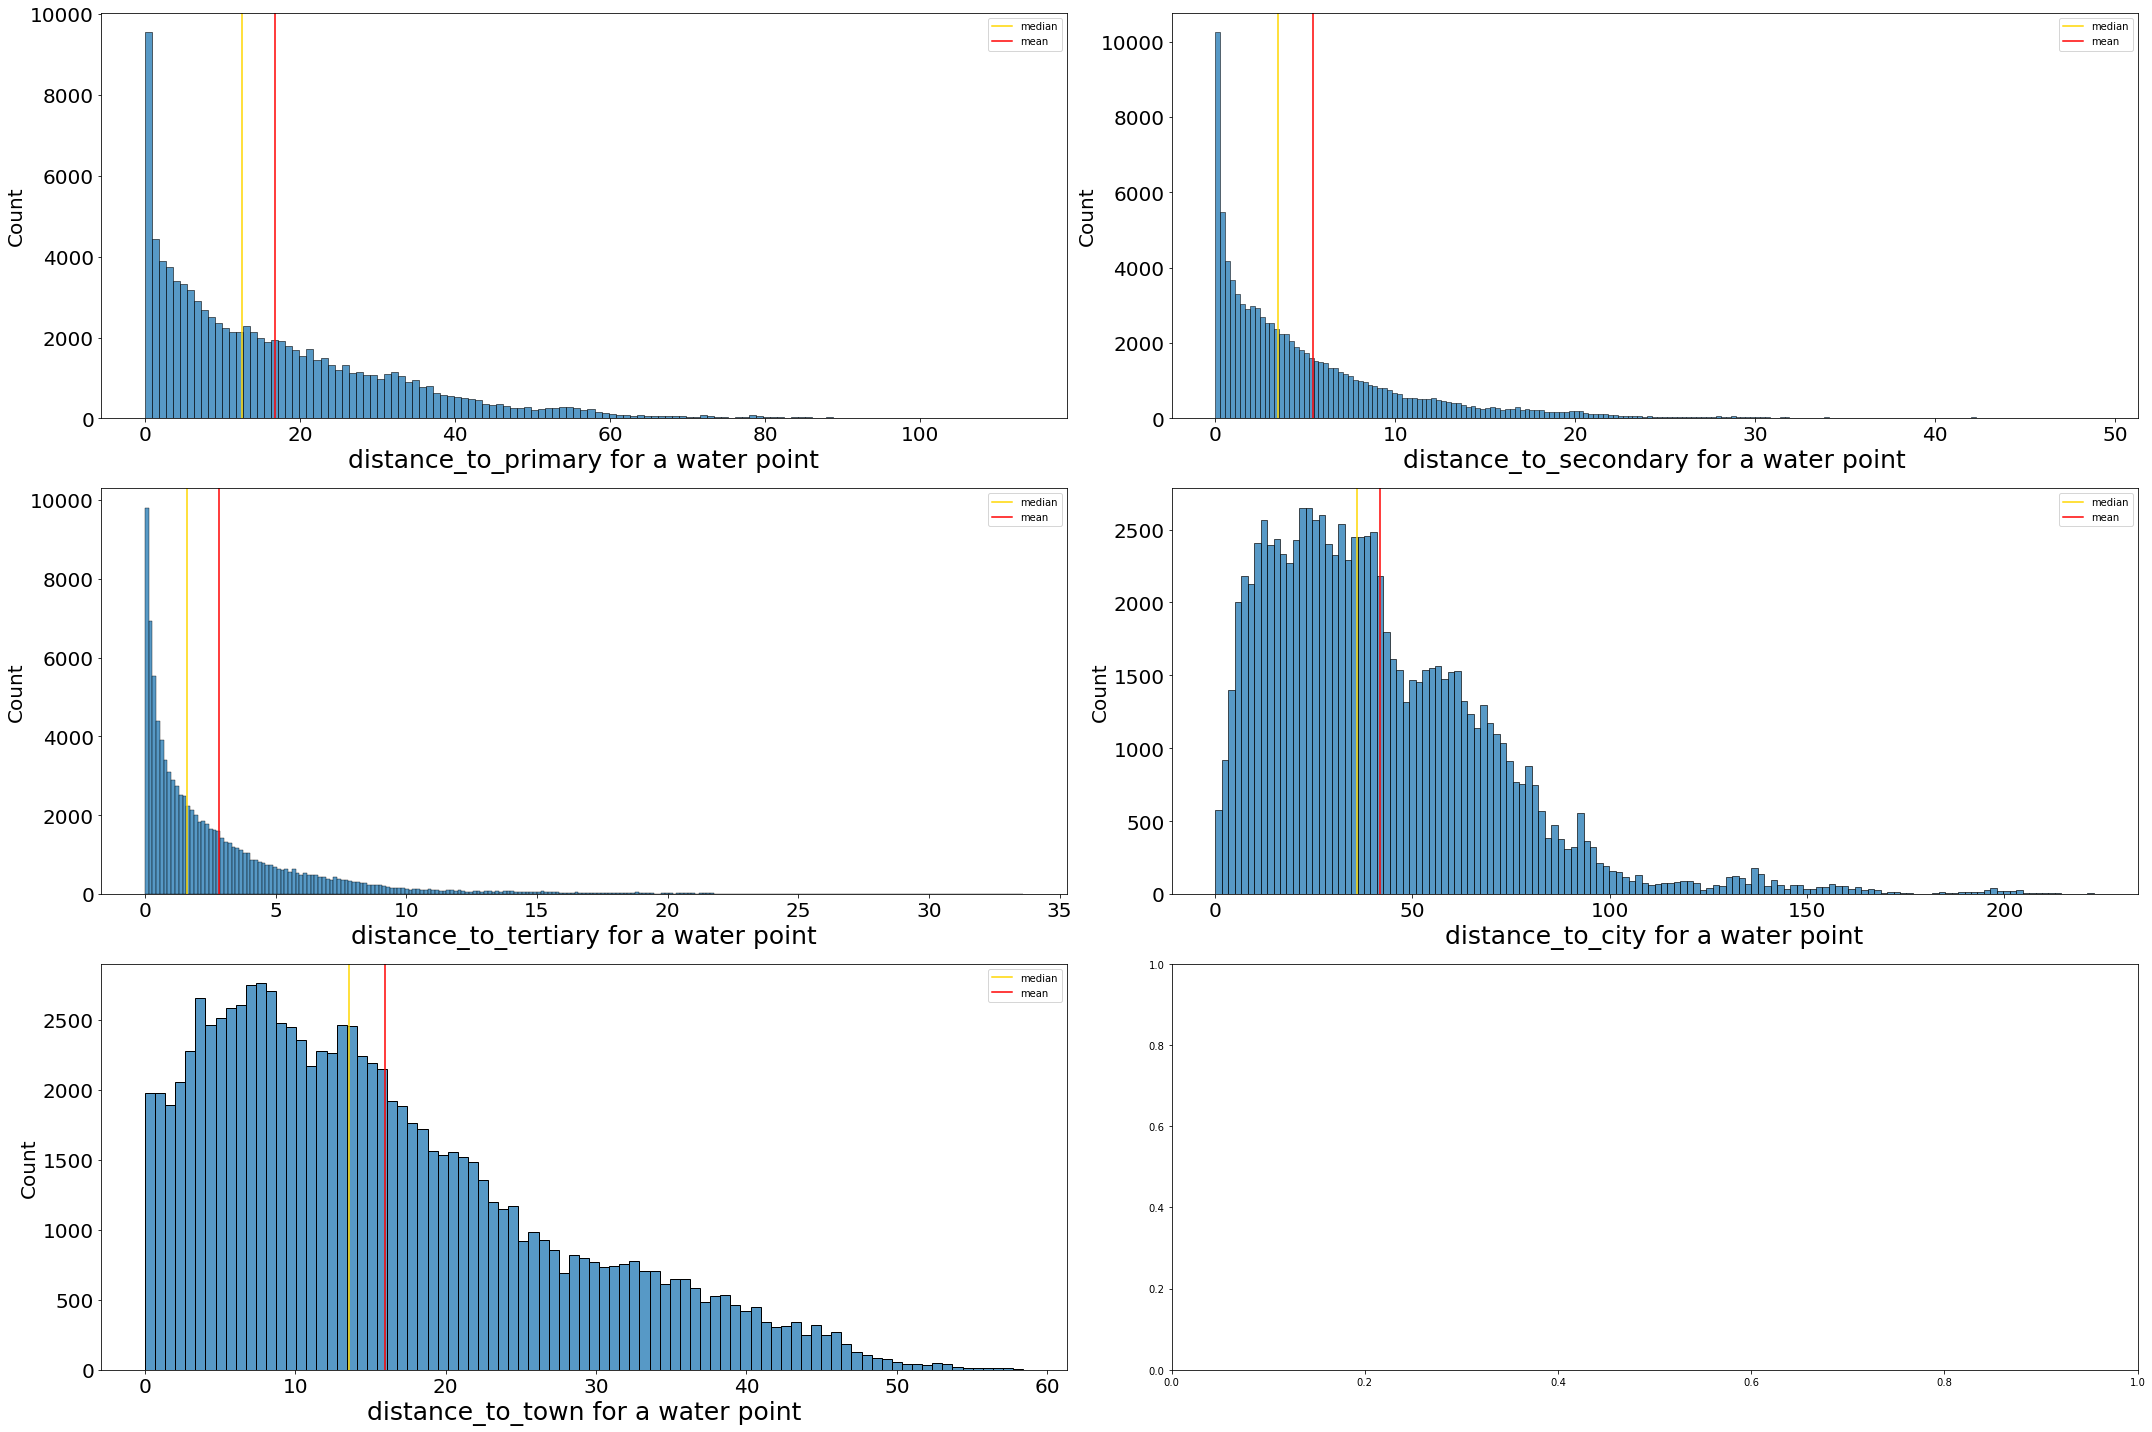

In [14]:
#visualise distances for water points
distances=['distance_to_primary', 'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city', 'distance_to_town']

#creating subplot
plt.subplots(3,2, figsize=(30,20))

for i, distance in enumerate(distances, 1):
    plt.subplot(3,2,i)

    sns.histplot(unique_water_points[distance])

    plt.xlabel(f"{distance} for a water point", size=25)
    plt.ylabel('Count', size=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)

    plt.axvline(unique_water_points[distance].median(), c='gold', label='median')  
    plt.axvline(unique_water_points[distance].mean(), c='r', label='mean')    

    plt.legend()
    plt.tight_layout()
plt.show()

We see that water points are usually closest to "second-class roads", the majority of them being less than 5km away. The next closest is a town, water points usually being less than 20km away. They are then, for the majority, withing 50km of a city. Regarding public services, water points are often within 20km of primary schools and 10km of secondary schools.

Distributions of a lot of our variables are heavily skewed to lower values. We will probably need to scale these in the future.

## 14. usage_cap

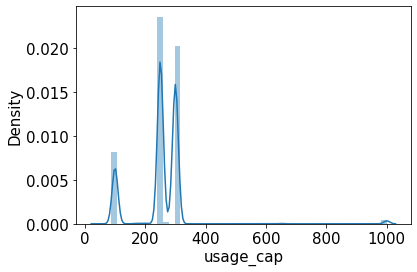

250.0     44.70
300.0     38.32
100.0     15.44
1000.0     0.81
275.0      0.27
Name: usage_cap, dtype: float64

In [18]:
#visualise
sns.distplot(unique_water_points['usage_cap'])

plt.xlabel('usage_cap', size=15)
plt.ylabel('Density', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

#usage capacity
round((unique_water_points['usage_cap'].value_counts(normalize=True)*100).head(),2)

The majority of water points have a usage capacity of around 250-300 people. There are a few outliers being able to service 1000 people, but they represent less than 1% of water points.

## 15. staleness_score

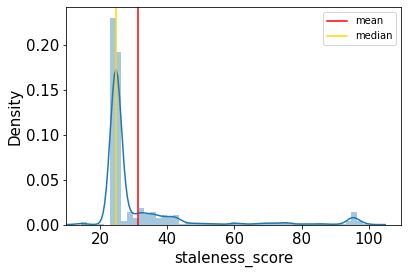

In [19]:
#visualise
sns.distplot(unique_water_points['staleness_score'])

plt.xlabel('staleness_score', size=15)
plt.ylabel('Density', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(10,)

plt.axvline(unique_water_points['staleness_score'].mean(), c='r', label='mean')
plt.axvline(unique_water_points['staleness_score'].median(), c='gold', label='median') 

plt.legend()

plt.show()

The staleness score tells us how much a report is worth, considering the amount of time and quality of the report. For example, we see that a large number of reports are "worth only 20%" of a day-old report. This metric is said to be qualitative and should be used with caution, we might look to disregard it in the future.

## 16. cluster_size

1.0    91.0
2.0     7.6
3.0     1.1
4.0     0.3
Name: cluster_size, dtype: float64

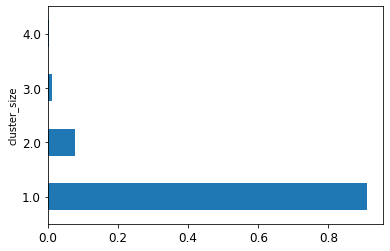

In [20]:
#proportion of each cluster size
unique_water_points['cluster_size'].value_counts(normalize=True).plot(kind='barh', ylabel='density', xlabel='cluster_size', fontsize=12)

#percentage
round(unique_water_points['cluster_size'].value_counts(normalize=True)*100,1)

Cluster size tells us if a location has shown up more often due to multiple water points being present very close. It seems that most are isolated and not next to each other.

## 17. is_complex_tech

In [21]:
#proportion of water points with complex technology
tech_distrib=master_df['is_complex_tech'].value_counts(normalize=True)*100

print(
    f"The distribution of water points is {round(tech_distrib[0],0).astype('int')}% not complex technology and {round(tech_distrib[1],0).astype('int')}% complex technology."
)

The distribution of water points is 62% not complex technology and 38% complex technology.


The way we defined whether a water installation was complex was loosely based on [Ravi & Rogger, 2021](http://www.rsomani.com/uploads/1/1/7/6/117690547/water_points_and_elections.pdf). Complex technologies included boreholes, piped water, dams, packaged and delivered water. Non-complex were springs, wells and rainwater harvesting.

## 18. is_installed_after_2006

In [22]:
#proportion of water points installed after the year 2006
installed_distrib=master_df['is_installed_after_2006'].value_counts(normalize=True)*100

print(
    f"The distribution of water points is {round(installed_distrib[0],0).astype('int')}% installed after 2006 and {round(installed_distrib[1],0).astype('int')}% installed before 2006."
)

The distribution of water points is 65% installed after 2006 and 35% installed before 2006.


We chose 2006 as a defining year because it was the [first multi-party election in Uganda for 25 years](http://news.bbc.co.uk/1/hi/world/africa/4750040.stm). We consider this a an important enough turning point to differentiate between water points. We see that 2/3 water points were constructed after that election.

In [23]:
#complex technologies after 2006
round(master_df[['is_installed_after_2006', 'is_complex_tech']].groupby('is_installed_after_2006').mean(),2)

is_complex_tech
is_installed_after_2006                 
0                                   0.37
1                                   0.39

We see that the proportion of water points which have complex technology is relatively similar for installations before and after 2006.

## 19. is_public_management

In [24]:
#proportion of water points installed after the year 2006
public_distrib=master_df['is_public_management'].value_counts(normalize=True)*100

print(
    f"The distribution of water points is {round(public_distrib[0],0).astype('int')}% managed by public bodies and {round(public_distrib[1],0).astype('int')}% not managed by public bodies."
)

The distribution of water points is 25% managed by public bodies and 75% not managed by public bodies.


We consider entities from the government, public institutionsa to be a form of "public" management. We also include community management as we assume they are, in some way, related to local governments or governance structures. We also assume that they have similar goals and incentives to the more formal government institutions. Religious, health and medical facilities follow the same reasoning.

In [25]:
#complex technologies after 2006
round(master_df[['is_installed_after_2006', 'is_public_management']].groupby('is_installed_after_2006').mean(),2)

is_public_management
is_installed_after_2006                      
0                                        0.75
1                                        0.75

Installations before or after 2006 have the same proportion of points managed by public institutions.

In [26]:
#complex technologies after 2006
round(master_df[['is_public_management', 'is_complex_tech']].groupby('is_public_management').mean(),2)

is_complex_tech
is_public_management                 
0                                0.35
1                                0.39

Similarly, there doesn't seem to be a difference in the technology depending on whether the point is managed by a public body or not.

## 20. served_population

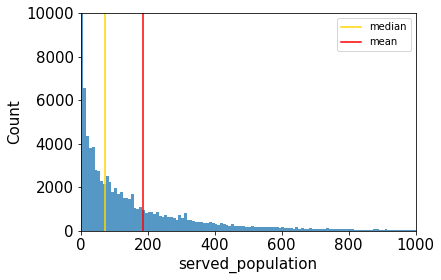

In [27]:
#visualise served population
sns.histplot(unique_water_points['served_population'],)

plt.xlabel('served_population', size=15)
plt.ylabel('Count', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0,1000)  
plt.ylim(0,10000)

plt.axvline(unique_water_points['served_population'].median(), c='gold', label='median')  
plt.axvline(unique_water_points['served_population'].mean(), c='r', label='mean')

plt.legend()

plt.show()

Water points usually service more than 200 people at a time.

## 21. local_population

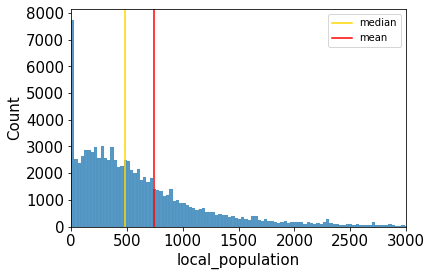

In [28]:
#visualise local population
sns.histplot(unique_water_points['local_population'])

plt.xlabel('local_population', size=15)
plt.ylabel('Count', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0,3000)  

plt.axvline(unique_water_points['local_population'].median(), c='gold', label='median')  
plt.axvline(unique_water_points['local_population'].mean(), c='r', label='mean')

plt.legend()

plt.show()

However, the local populations are usually around 500 people. This means that a large number of water points do not service all of the population in their vicinity. We have created a new variable to capture this: the proportion of the local population that is currently served by the water point.

## 22. crucialness

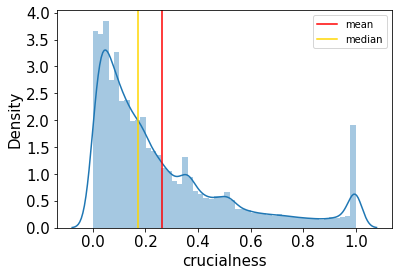

In [29]:
#visualise
sns.distplot(unique_water_points['crucialness'])

plt.xlabel('crucialness', size=15)
plt.ylabel('Density', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.axvline(unique_water_points['crucialness'].mean(), c='r', label='mean')
plt.axvline(unique_water_points['crucialness'].median(), c='gold', label='median') 

plt.legend()

plt.show()

A lot of water points have a low crucialness score, suggesting they aren't that important to the local population. We do see an non-negligible portion of points with a curcialness score of 1, which eans they are incredibly important and should probably be prioritised when making repair/rehabilitation decisions.

## 23. pressure

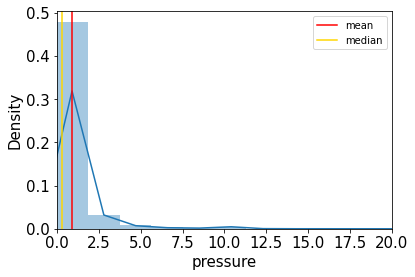

In [36]:
#visualise
sns.distplot(unique_water_points['pressure'], bins=200)

plt.xlabel('pressure', size=15)
plt.ylabel('Density', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0,20)

plt.axvline(unique_water_points['pressure'].mean(), c='r', label='mean')
plt.axvline(unique_water_points['pressure'].median(), c='gold', label='median') 

plt.legend()

plt.show()

The pressure metric doesn't seem to be very informative of a water point, most of them being under 10. This means that the point is utilising under 10% of its theoretical capacity.

## 24-45. Demographics and Regional statistics

In [37]:
#visualise variables by adm1
adm1_df=master_df.groupby("clean_adm1").mean()

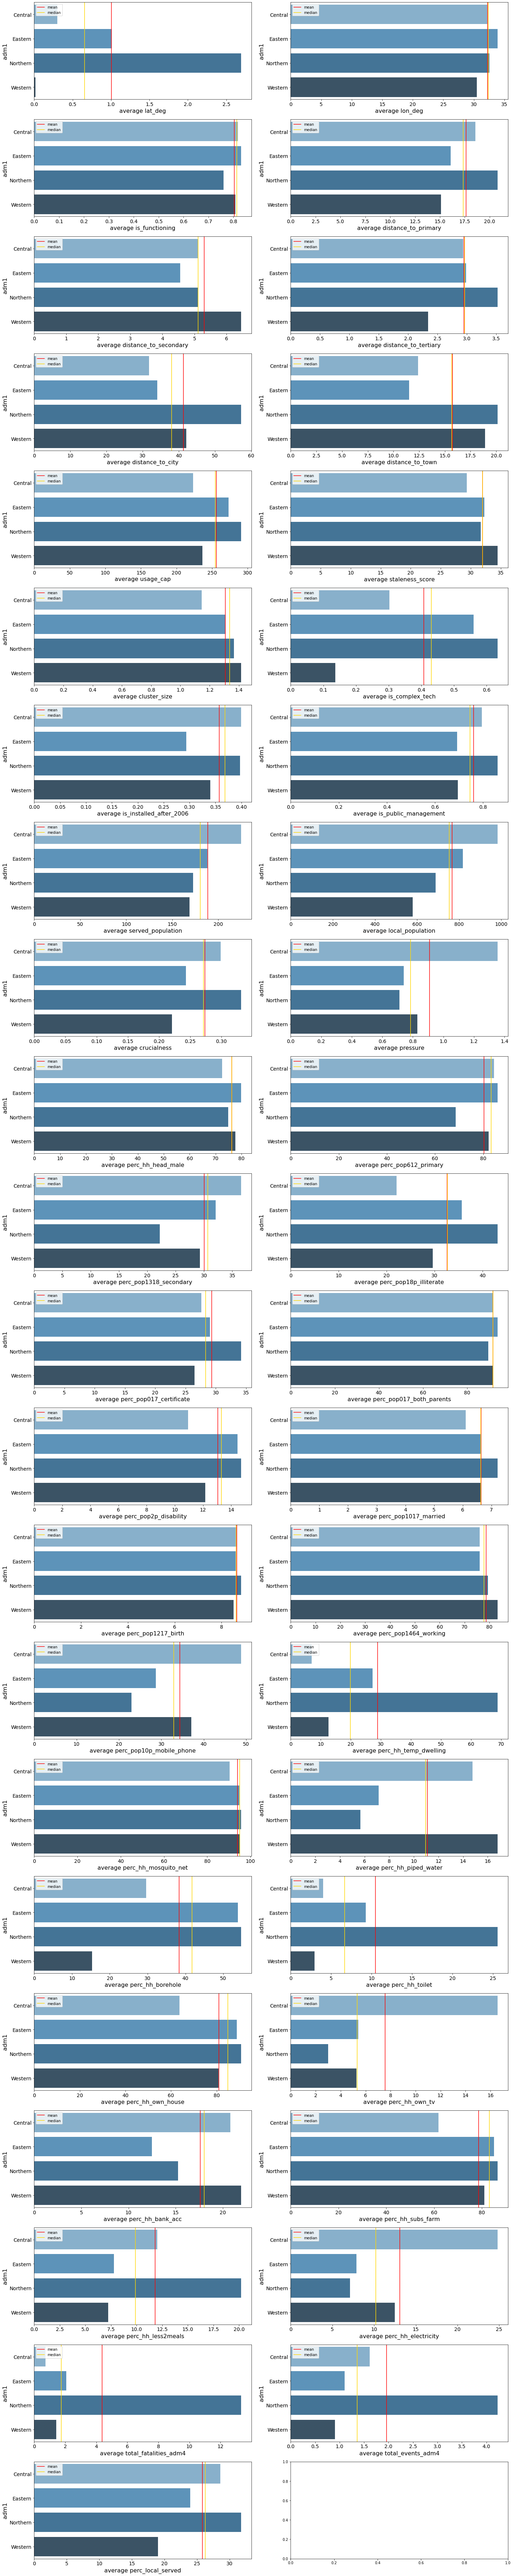

In [38]:
#creating subplot
plt.subplots(22,2, figsize=(20,100))

#all variables by adm1 regional level
for i, variable in enumerate(adm1_df.columns, 1):
    plt.subplot(22,2,i)

    sns.barplot(data=adm1_df, y=adm1_df.index, x=adm1_df[variable], palette="Blues_d")

    plt.xlabel(f"average {variable}", size=16)
    plt.ylabel('adm1', size=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    plt.axvline(adm1_df[variable].mean(), c='r', label='mean')  
    plt.axvline(adm1_df[variable].median(), c='gold', label='median')

    plt.legend(loc='upper left')
    plt.tight_layout()

plt.show()

We're looking at the trends between large, adm1, regions to see whether it would make sense to create dummy columns for them. First let's see the [Human Development Index](https://en.wikipedia.org/wiki/List_of_regions_of_Uganda_by_Human_Development_Index) for each region. The HDI is between 0 (least developed) and 1 (most developed). It takes life expectancy, eduaction and per capita income as inputs to compute the index. It is often considered as a better alternative to GDP to measure the development of a region.


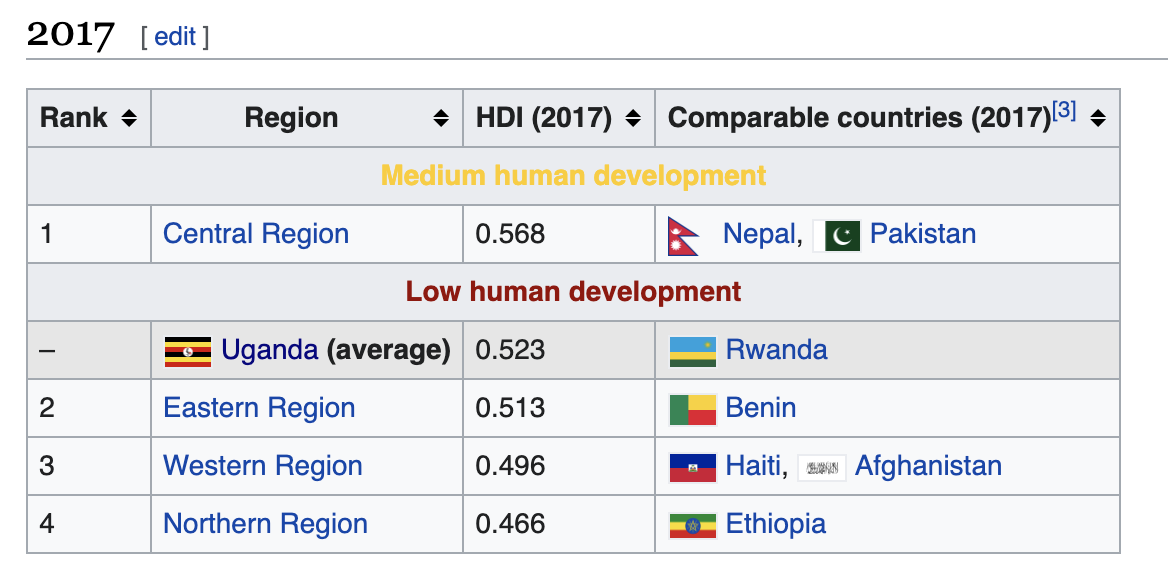

In [39]:
#table from wikipedia
Image(images_filepath+"HDI_Uganda.png")

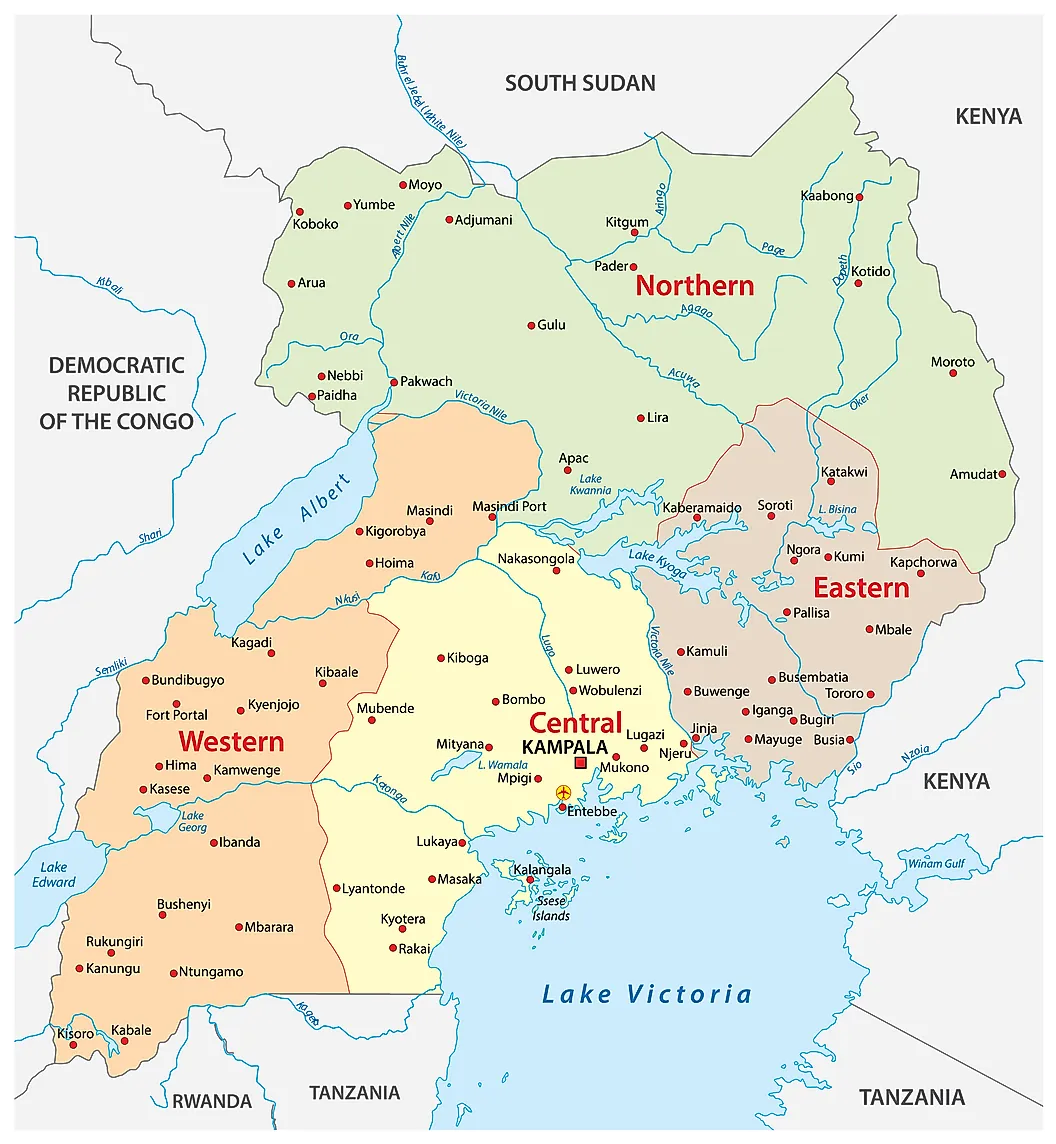

In [40]:
#map
Image(images_filepath+"Map_Uganda.png")

We see that the Central region is the most developed region of Uganda and this is seen in our demographic data. It is where the capital is (Kampala) and borders a large body of water, Lake Victoria. It also has very few borders with foreign countries. Water points in the Central region are close to towns and cities. They also have highest pressure, due to the high number of people living close to these water points. Central has especially high school enrollment rates and literacy rates. Households in Central have lower house ownership rates, urbanisation and bigger cities usually lead to a higher proportion of the population renting. However they do own TVs at higher rates than the rest of the country, more often have bank accounts and have access to electricity. Electrification is a very good indicator of the development of a region. Finally, water points serve a larger proportion of the local population than other regions and households have more often access to piped water. Water access is another important sign of development.

The Eastern region is just under the Uganda average. It's indicators are usually in between the Central (most developed)and Northern (least developed) regions' values. Eastern borders a stable, prosperous country, Kenya and has access to Lake Victoria. Water points here are usually close to cities and towns, with most of them installed before 2006. Households in this region have notably high rates of access to boreholes and toilet facilities.

The Western region is on the lower end of the HDI scale. Similarly, most of its indicators is between the Central and Northern regions. The majority of the borders of the region are shared with the DRC, notoriously unstable and often violent country. Uganda has been involved in wars in and against Congo as well as supporting rebel groups in that country. Water points here are usually far from schools but close to roads. Western households have a hig rate of access to bank accounts andpiped water. The employment rate is also especially high in the Western region.

Finally, the Northern region is least developed and the most violent region in the past quarter century. It borders unstable countries: South Sudan and the DRC. Northern is the most violent region in terms of conflict events and fatalities. It has much lower development indicators such as school enrollment, high literacy rate, mobile phone ownership. It also has a high proportion of households experiencing food shortages (less than 2 meals a day) and living in temporary dwellings.

Regarding water points, those in the Northern region are usually less functioning, are further away from roads and are more often managed by public institutions. They also have the highest crucialness scores.

In [41]:
#get adm1 dummies
dummy=pd.get_dummies(master_df['clean_adm1'])

#check
dummy.head()

Central  Eastern  Northern  Western
0        0        0         0        1
1        0        0         0        1
2        0        0         0        1
3        0        0         0        1
4        0        0         0        1

In [42]:
#drop Northern column
dummy=dummy.drop(columns='Northern')

#check
dummy.head()

Central  Eastern  Western
0        0        0        1
1        0        0        1
2        0        0        1
3        0        0        1
4        0        0        1

This means that when our three adm1 columns are equal to 0 then that observation is in the Northern region.

In [43]:
#join with master dataframe
master_df_region=pd.concat([master_df, dummy], axis=1)

#check
master_df_region.head()

wpdx_id   lat_deg    lon_deg  is_functioning clean_adm1  clean_adm2  \
0           NaN  0.158537  30.490643               1    Western    Kamwenge   
1           NaN  0.070597  30.415651               1    Western  Kitagwenda   
2           NaN  0.158667  30.490551               1    Western    Kamwenge   
3  6GGGCQJ2+5QW  0.430480  30.751951               0    Western    Kamwenge   
4  6GFGV982+4JG -0.134680  30.351593               1    Western  Kitagwenda   

   clean_adm3 clean_adm4  distance_to_primary  distance_to_secondary  ...  \
0      Kibale  Kabambiro            37.666023               4.875484  ...   
1  Kitagwenda   Nyabbani            35.843273               2.602279  ...   
2      Kibale  Kabambiro            37.651727               4.860170  ...   
3      Kibale      Bwizi            14.592108              16.548334  ...   
4  Kitagwenda   Kicheche            29.073130               6.369318  ...   

   perc_hh_bank_acc  perc_hh_subs_farm  perc_hh_less2meals  \
0         10.259377          91.358551            4.212975   
1         14.573029          92.319897            4.458575   
2         10.259377          91.358551            4.212975   
3          6.879652          95.096440            5.003880   
4         20.201299          87.522511            4.271490   

   perc_hh_electricity  total_fatalities_adm4  total_events_adm4  \
0             4.461754                    0.0                0.0   
1             7.565426                    0.0                0.0   
2             4.461754                    0.0                0.0   
3             8.693308                    0.0                0.0   
4             9.606041                    0.0                0.0   

   perc_local_served  Central  Eastern  Western  
0           6.525573        0        0        1  
1          12.773723        0        0        1  
2           6.525573        0        0        1  
3           4.000000        0        0        1  
4           9.289617        0        0        1  

[5 rows x 51 columns]

## 46. total_fatalities_adm4

In [44]:
#dataset of fatalities by region
fatalities_adm=master_df[['clean_adm1', 'clean_adm2','clean_adm3', 'clean_adm4', 'total_fatalities_adm4']]\
    .groupby(['clean_adm1', 'clean_adm2','clean_adm3', 'clean_adm4']).mean()

fatalities_adm.reset_index(inplace=True)

#check
fatalities_adm.head()

clean_adm1 clean_adm2 clean_adm3               clean_adm4  \
0    Central     Buikwe     Buikwe                   Buikwe   
1    Central     Buikwe     Buikwe      Buikwe Town Council   
2    Central     Buikwe     Buikwe                    Najja   
3    Central     Buikwe     Buikwe                   Ngogwe   
4    Central     Buikwe     Buikwe  Nkokonjeru Town Council   

   total_fatalities_adm4  
0                    3.0  
1                    0.0  
2                    0.0  
3                    2.0  
4                    0.0

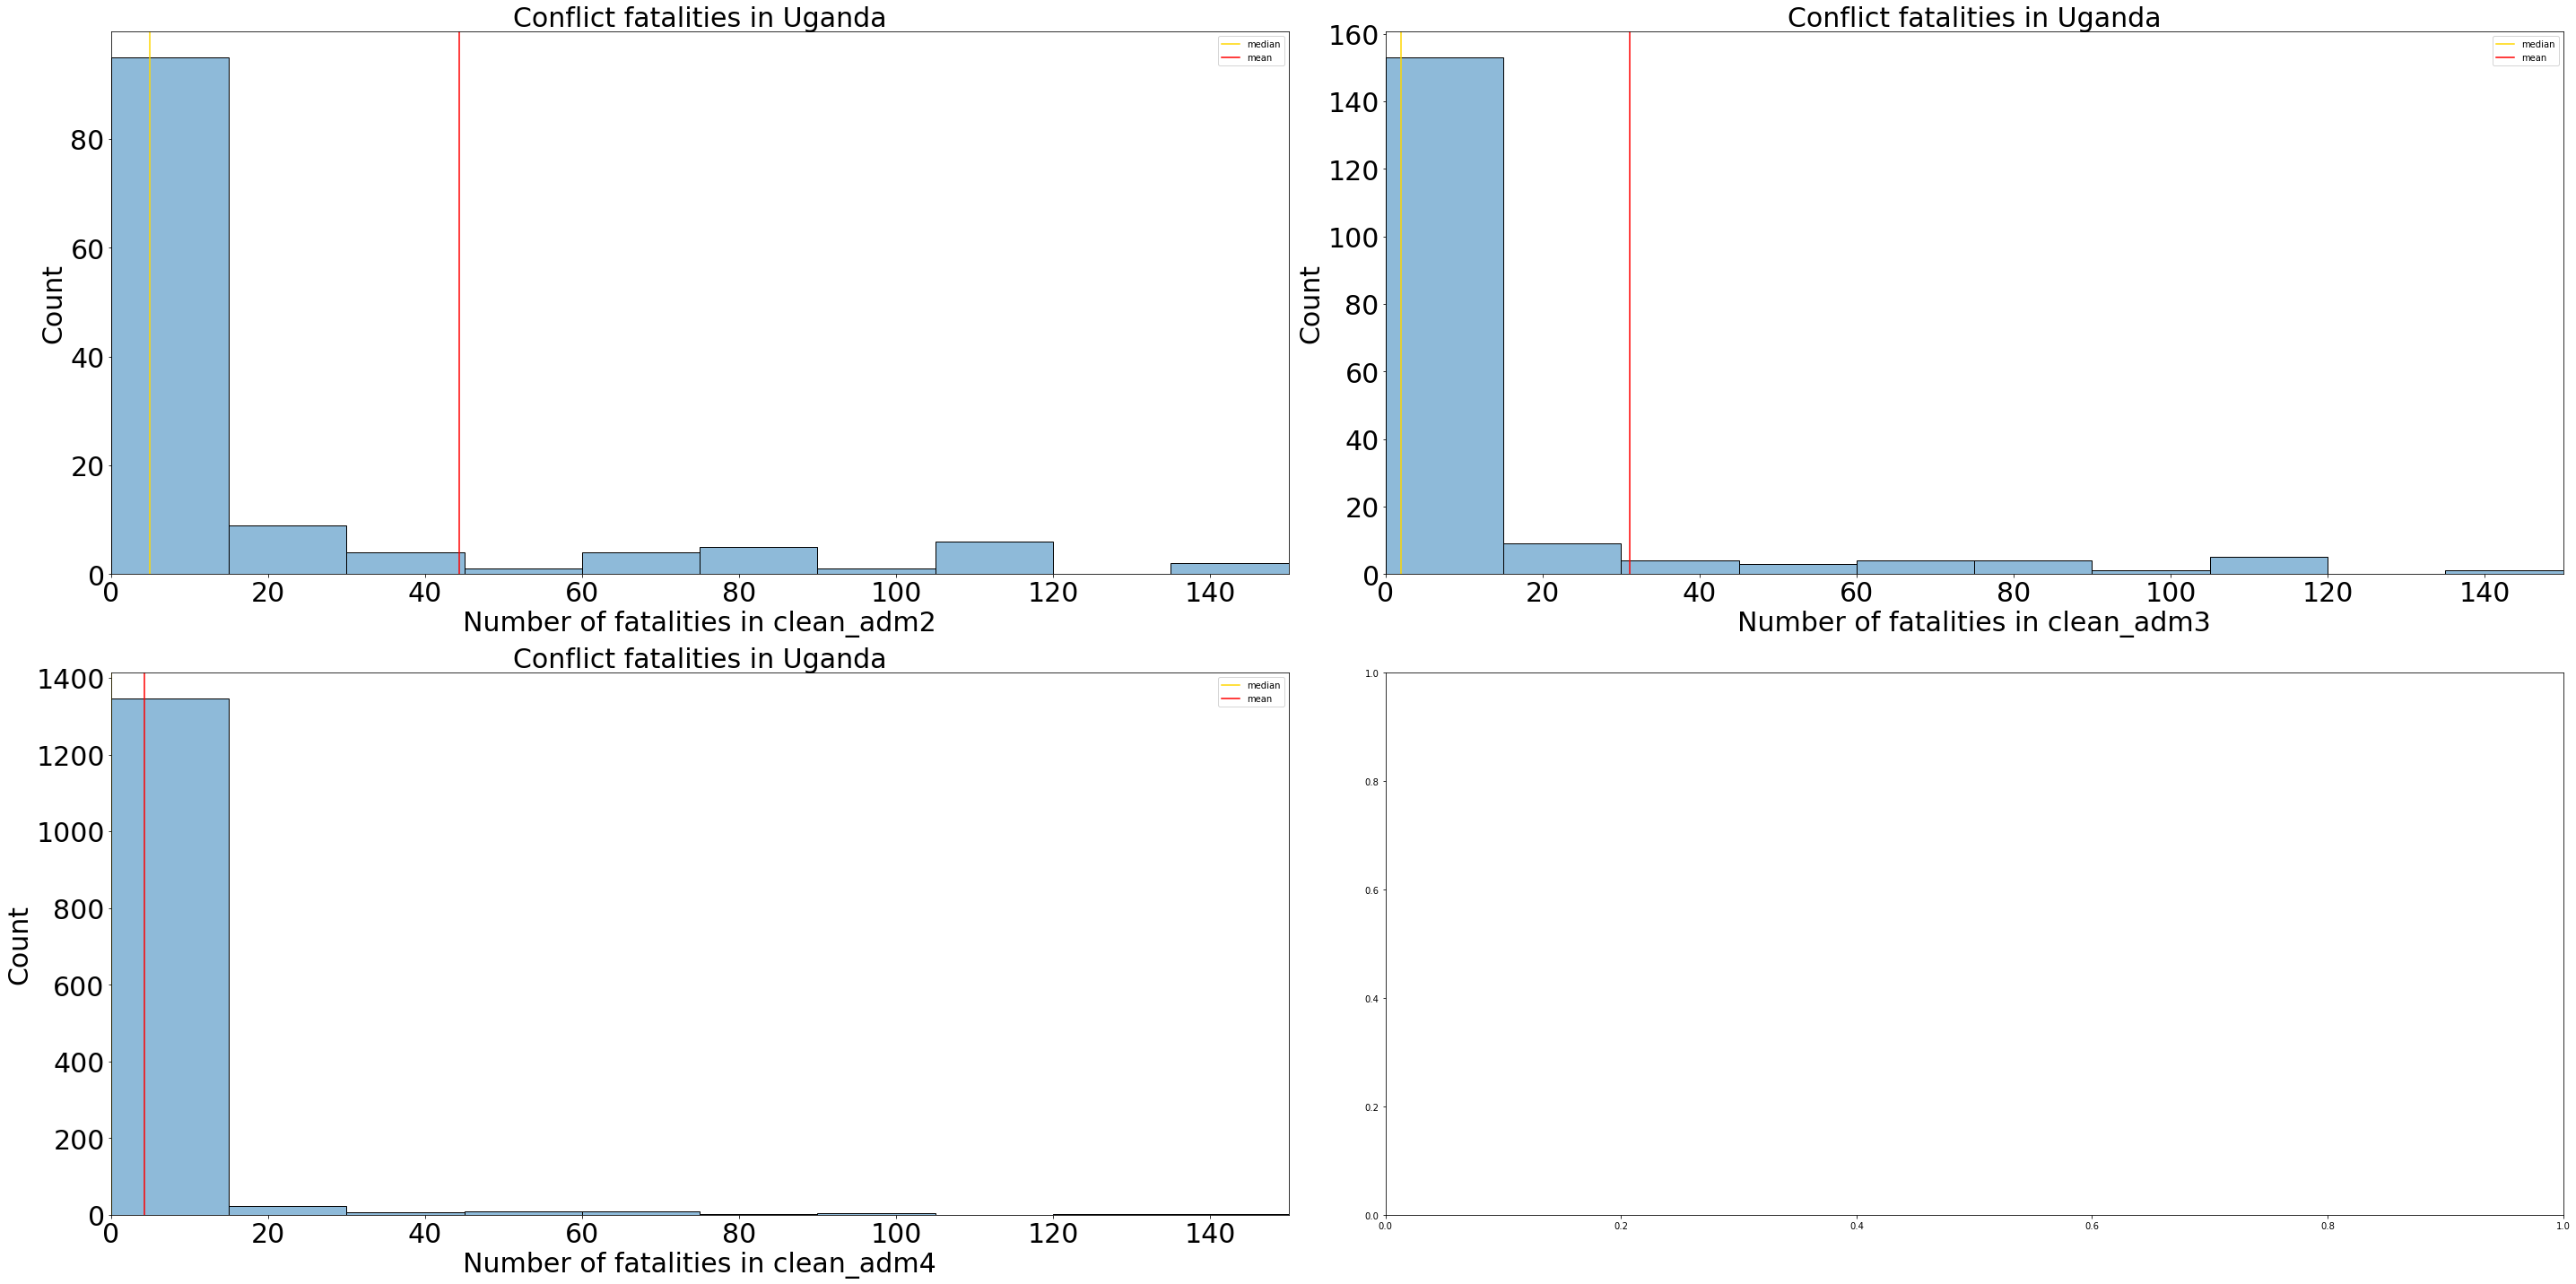

In [87]:
#list of regional level
regions=['clean_adm2', 'clean_adm3', 'clean_adm4']

#visualise through a subplot
plt.subplots(2,2, figsize=(40,20))

for i, adm in enumerate(regions, 1):
    adm_fatalities=fatalities_adm[[adm,'total_fatalities_adm4']].groupby(adm).sum()
    plt.subplot(2,2,i)

    sns.histplot(adm_fatalities, binrange=(0,150), bins=10)

    plt.title(f"Conflict fatalities in Uganda", size=30)
    plt.xlabel(f'Number of fatalities in {adm}', size=30)
    plt.ylabel('Count', size=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylim(0,)
    plt.xlim(0,150)

    plt.axvline(adm_fatalities['total_fatalities_adm4'].median(), c='gold', label='median')
    plt.axvline(adm_fatalities['total_fatalities_adm4'].mean(), c='r', label='mean')

    plt.legend()
plt.tight_layout()
plt.show()

More than 3/4 of regions have not had any official fatalities since 1997. We see that violence is concentrated in certain regions. We have, for example, multiple regions with up to 800+ fatalities.

## 47. total_events_adm4

In [46]:
#dataset of event by region
events_adm=master_df[['clean_adm1', 'clean_adm2','clean_adm3', 'clean_adm4', 'total_events_adm4']]\
    .groupby(['clean_adm1', 'clean_adm2','clean_adm3', 'clean_adm4']).mean()

events_adm.reset_index(inplace=True)

#check
events_adm.head()

clean_adm1 clean_adm2 clean_adm3               clean_adm4  total_events_adm4
0    Central     Buikwe     Buikwe                   Buikwe                8.0
1    Central     Buikwe     Buikwe      Buikwe Town Council                0.0
2    Central     Buikwe     Buikwe                    Najja                0.0
3    Central     Buikwe     Buikwe                   Ngogwe                2.0
4    Central     Buikwe     Buikwe  Nkokonjeru Town Council                0.0

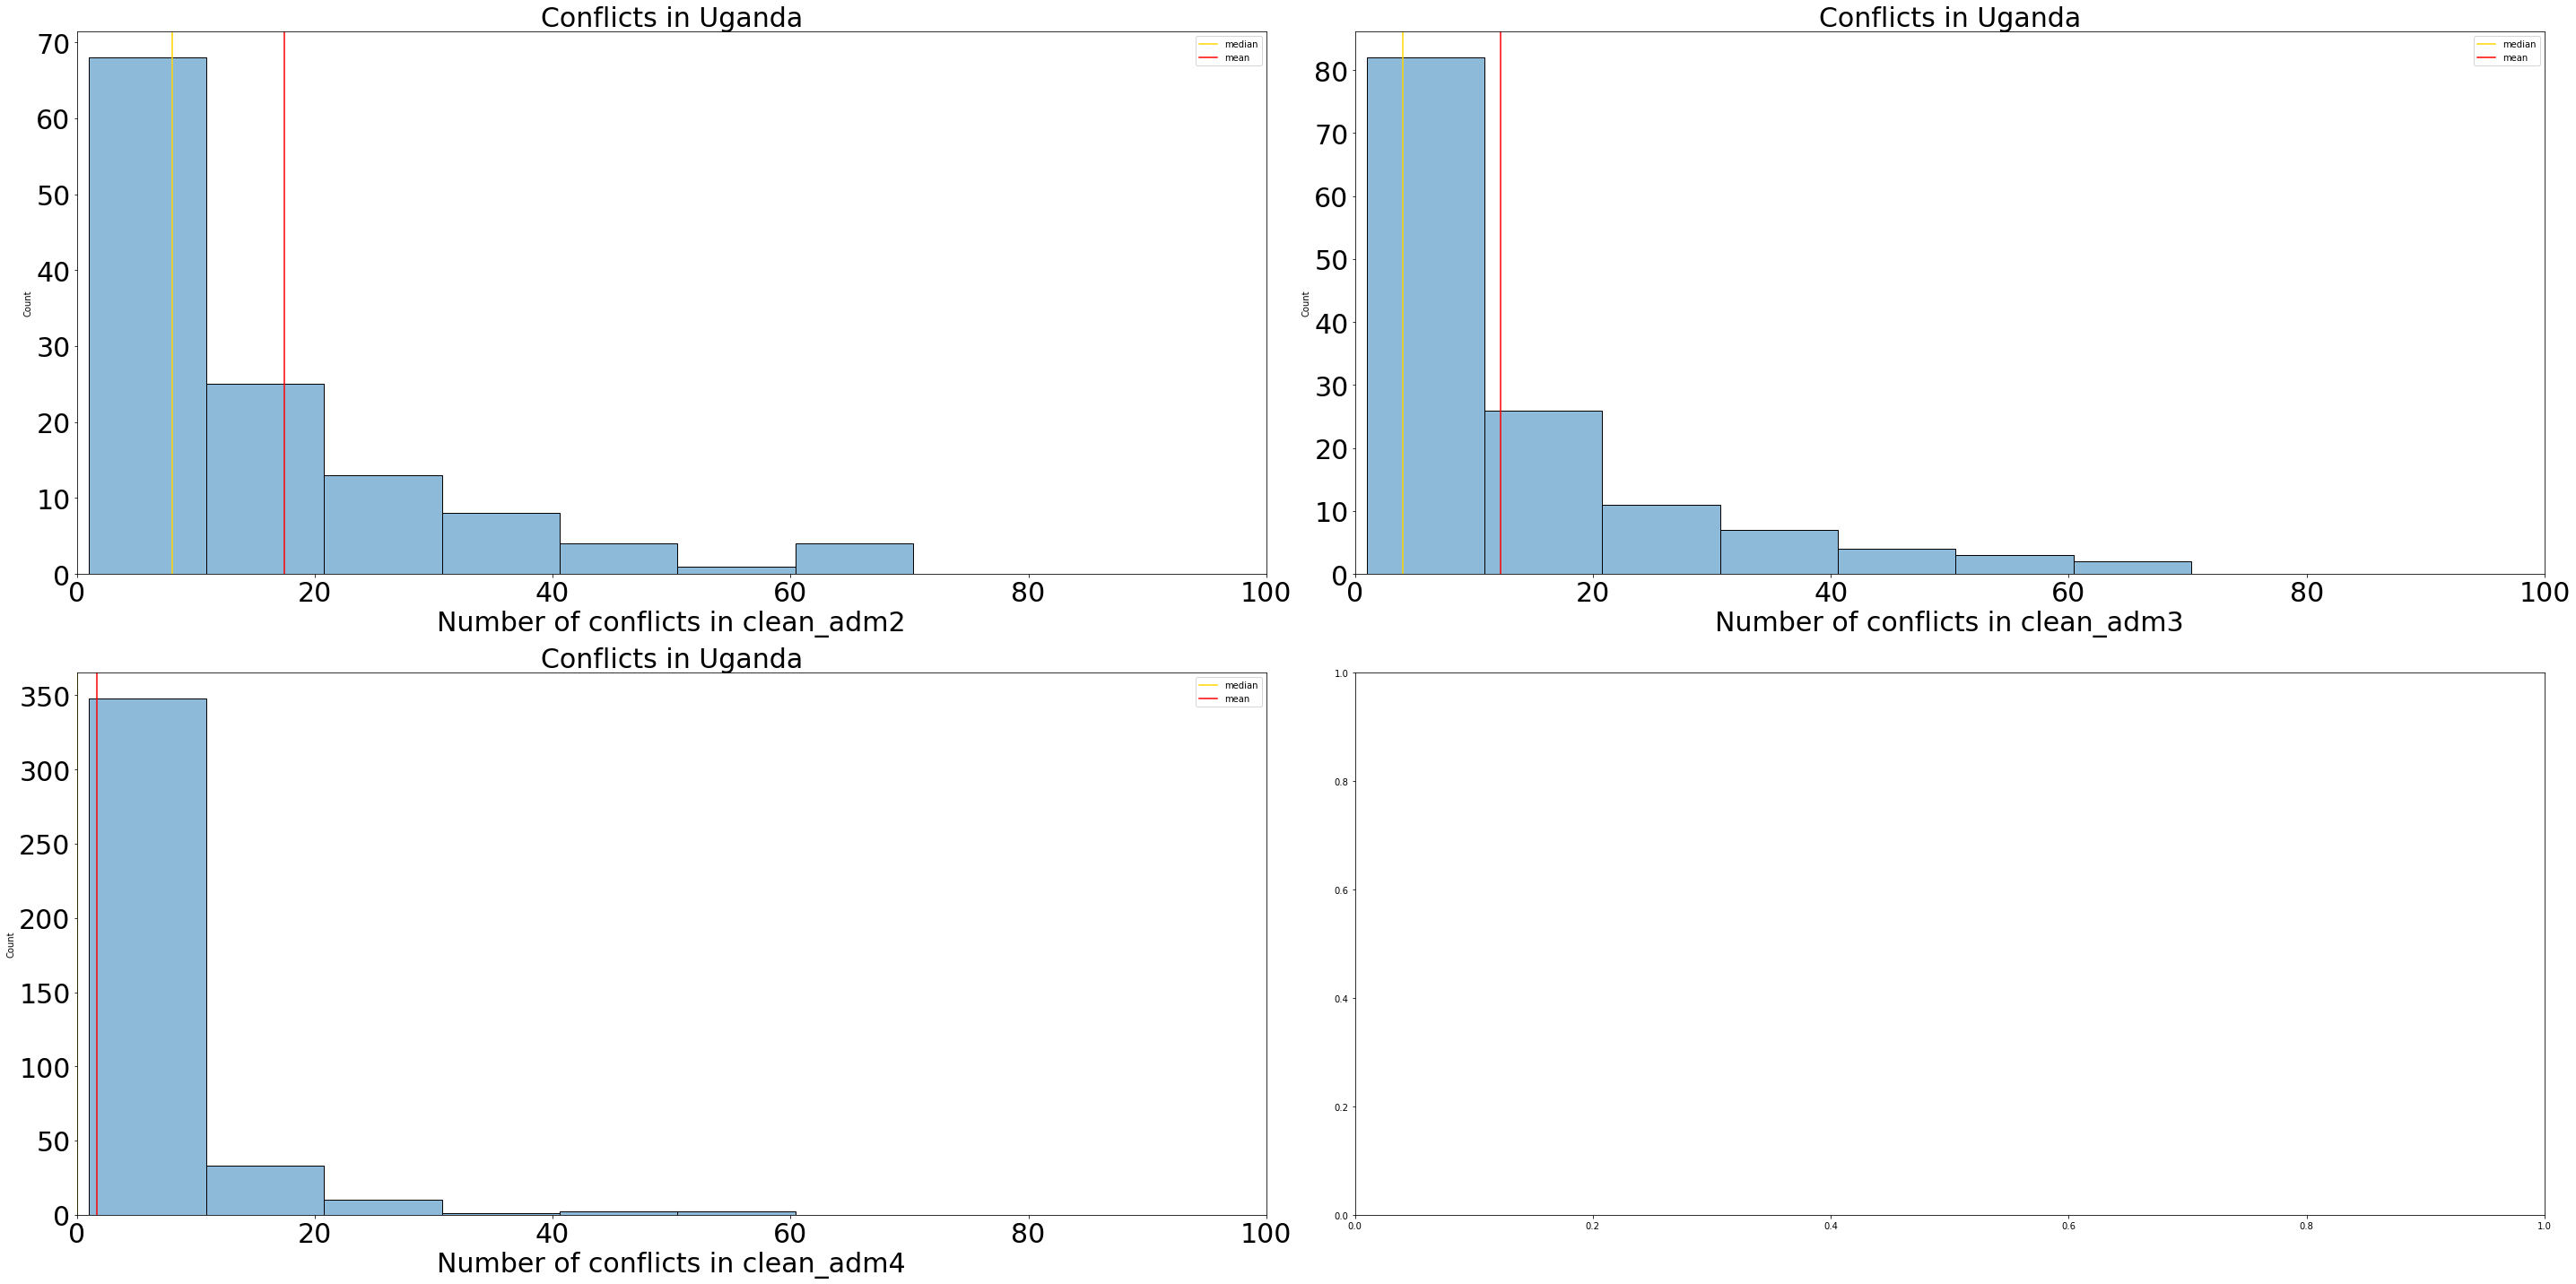

In [89]:
#list of regional level
regions=['clean_adm2', 'clean_adm3', 'clean_adm4']

#visualise through a subplot
plt.subplots(2,2, figsize=(40,20))

for i, adm in enumerate(regions, 1):
    adm_events=events_adm[[adm,'total_events_adm4']].groupby(adm).sum()
    plt.subplot(2,2,i)

    sns.histplot(adm_events, binrange=(1,100), bins=10)

    plt.title(f"Conflicts in Uganda", size=30)
    plt.xlabel(f'Number of conflicts in {adm}', size=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylim(0,)
    plt.xlim(0,100)

    plt.axvline(adm_events['total_events_adm4'].median(), c='gold', label='median')
    plt.axvline(adm_events['total_events_adm4'].mean(), c='r', label='mean')

    plt.legend()
plt.tight_layout()
plt.show()

Most adm4 regions have had less than 25 conflicts in the past 24 years (1997-2022).  Similarly, adm3 and adm2 regions usually have less than 75 conflicts. As seen in the summary statistics initially, there are a few very violent regions in the country where most conflicts occur.

## 48. perc_local_served

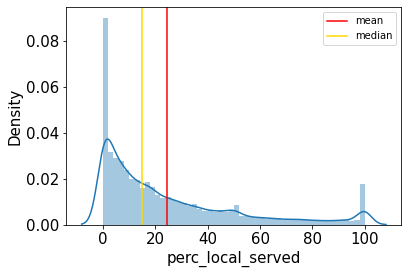

In [48]:
#visualise
sns.distplot(unique_water_points['perc_local_served'])

plt.xlabel('perc_local_served', size=15)
plt.ylabel('Density', size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim()

plt.axvline(unique_water_points['perc_local_served'].mean(), c='r', label='mean')
plt.axvline(unique_water_points['perc_local_served'].median(), c='gold', label='median') 

plt.legend()

plt.show()

We see that a lot of water points do not serve a large part of its local population. This is due to a lot of water points not having many (or any) people living withing a 1km radius of the water point. Althought this is possible, we think it is more likely to be a reporting error for some of those 0s.

# C. Correlation

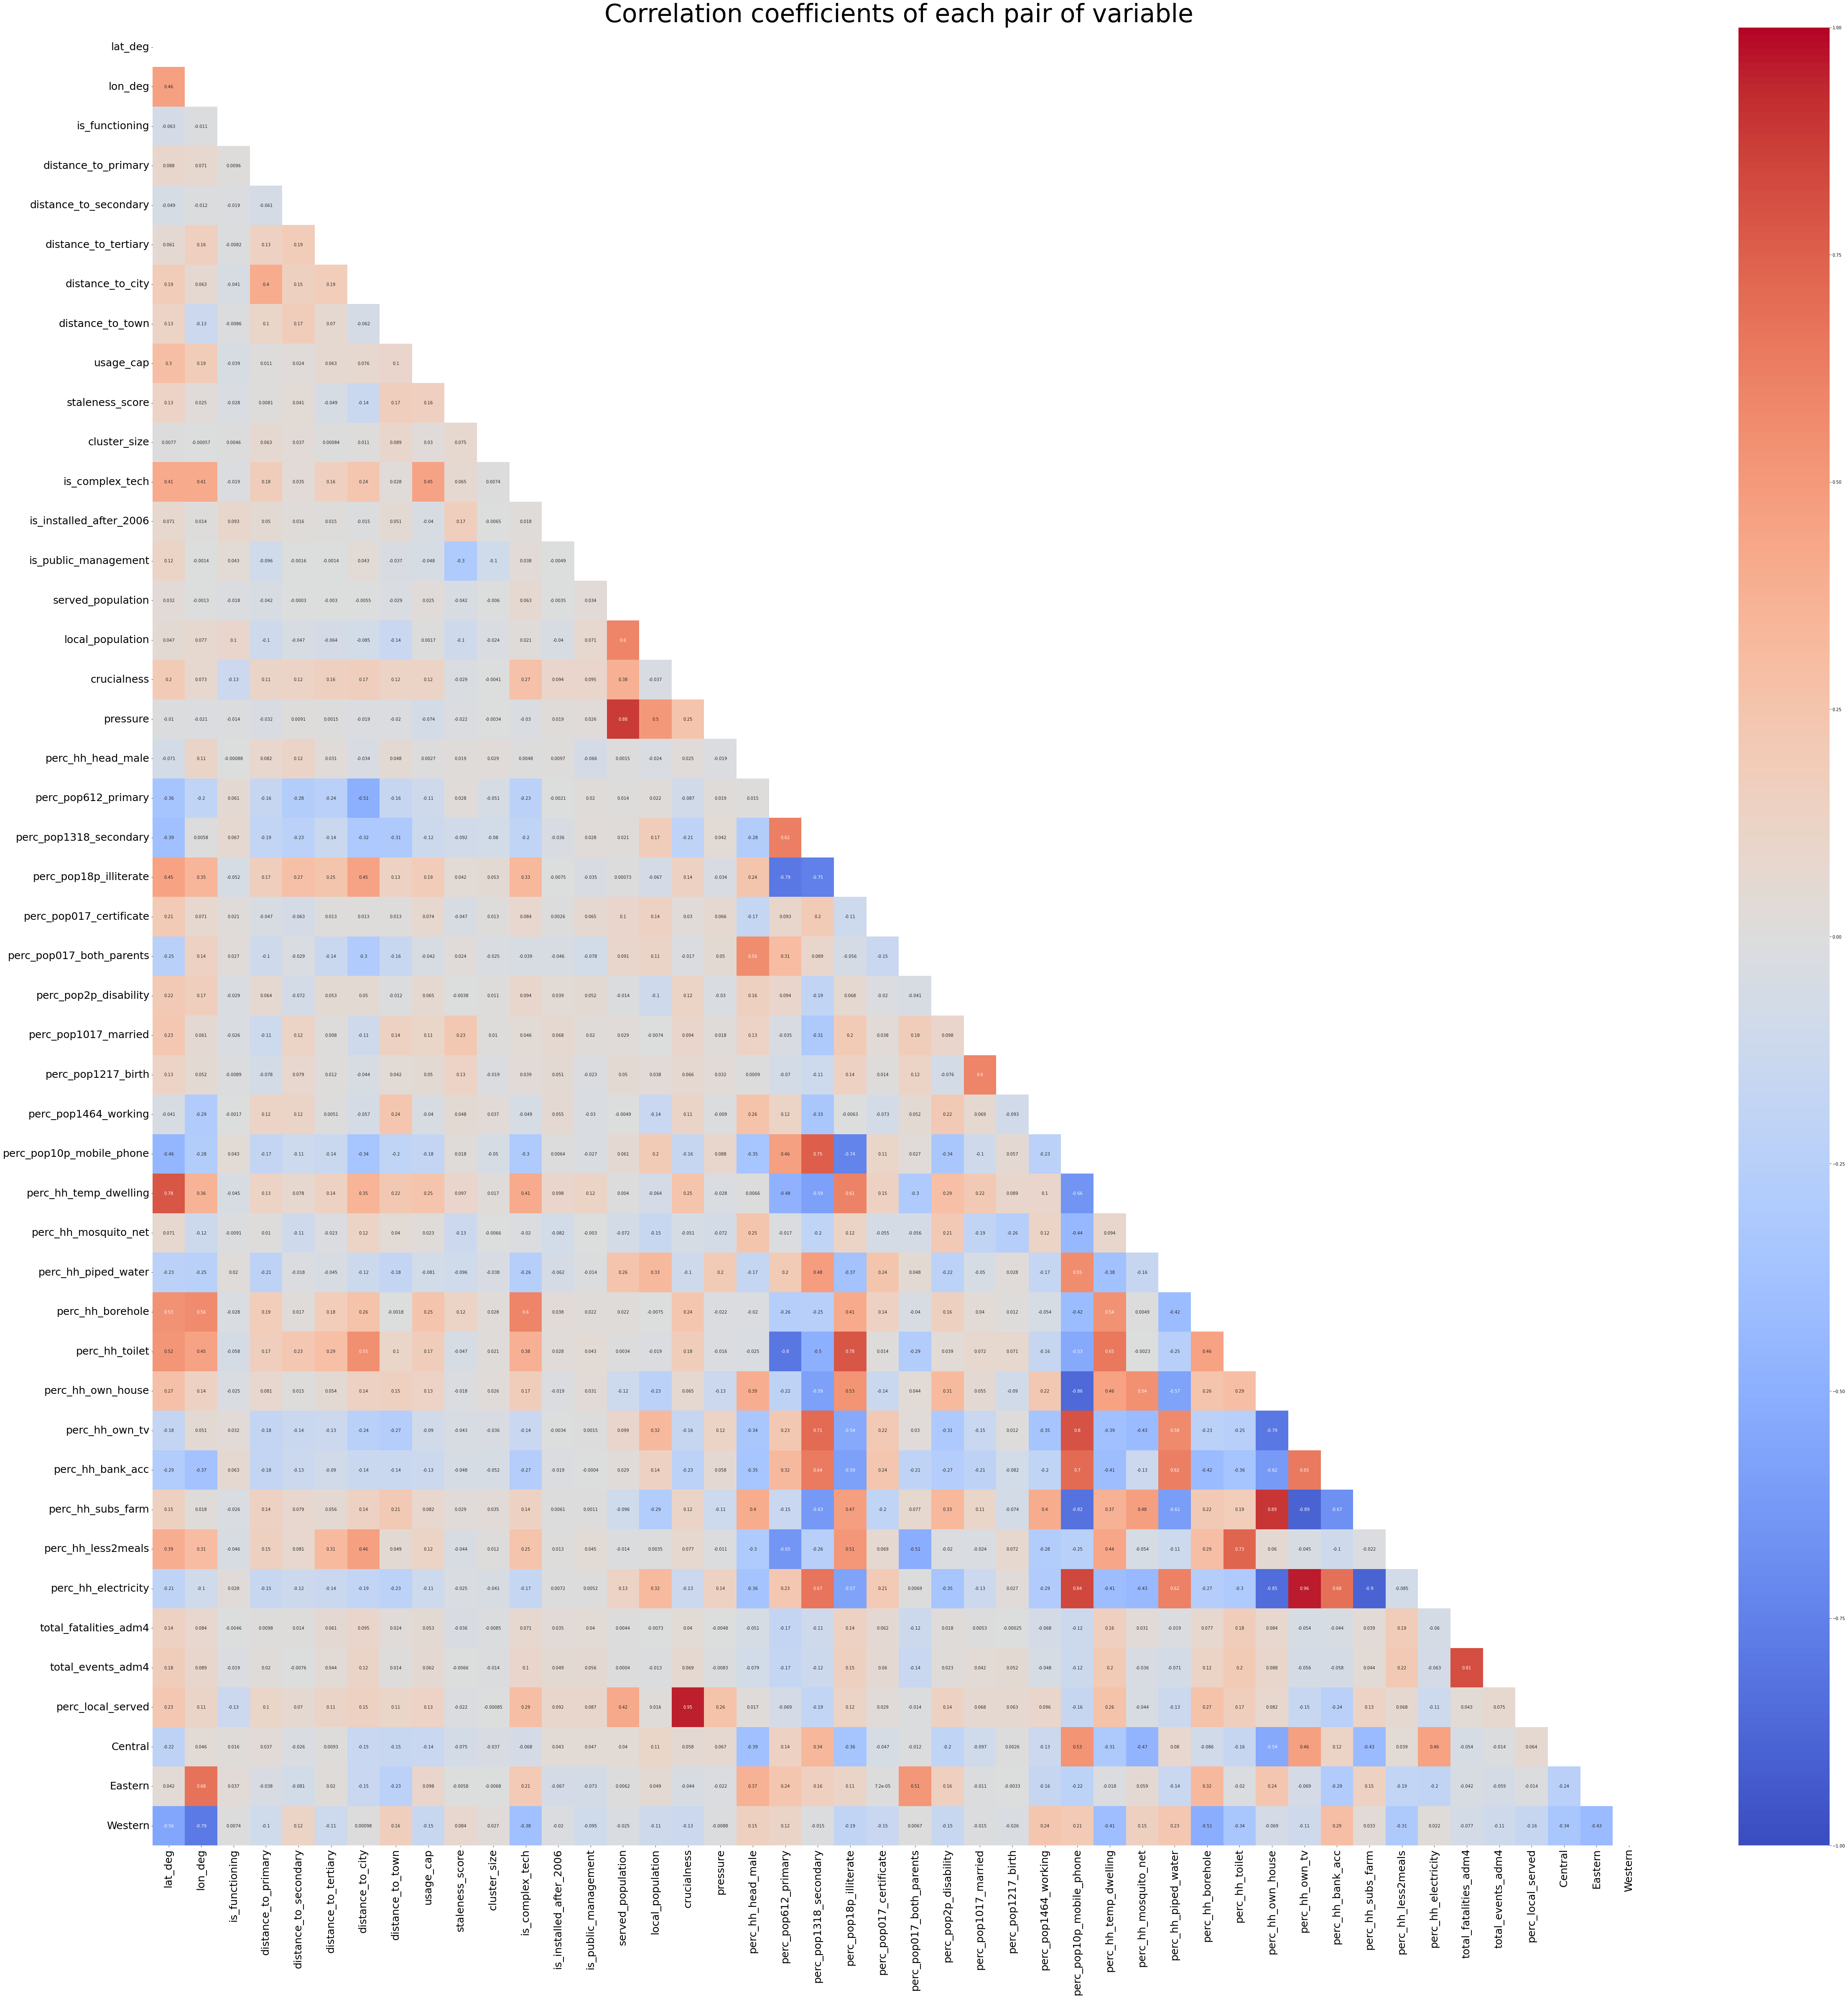

In [49]:
plt.figure(figsize=(80,80))

#Creating matrix of correlations between each pair of variables
matrix = np.triu(master_df_region.corr())

#Applying heatmap correlations
sns.heatmap(master_df_region.corr(), annot=True, mask=matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation coefficients of each pair of variable', size=60)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

The heatmap above is not easy to understand due to the number of columns. By zooming in we can identify a few trends:

- number of fatalities and number of events is heavily correlated which makes sense as the more conflicts the higher the chance of people getting hurt.
- crucialness and percentage of local population served also. They try to measure the same thing but in a slightly different way.
- the percentage of illiterate people is correlared with primary and secondary enrollment. People going to school will be able to read and write.
- more broadly, primary and secondary enrollment is heavily correlated with many other demographic variables
- mobile phone ownership, TV ownership, electricity access, bank account ownership are all similarly correlated with other demographic variable 

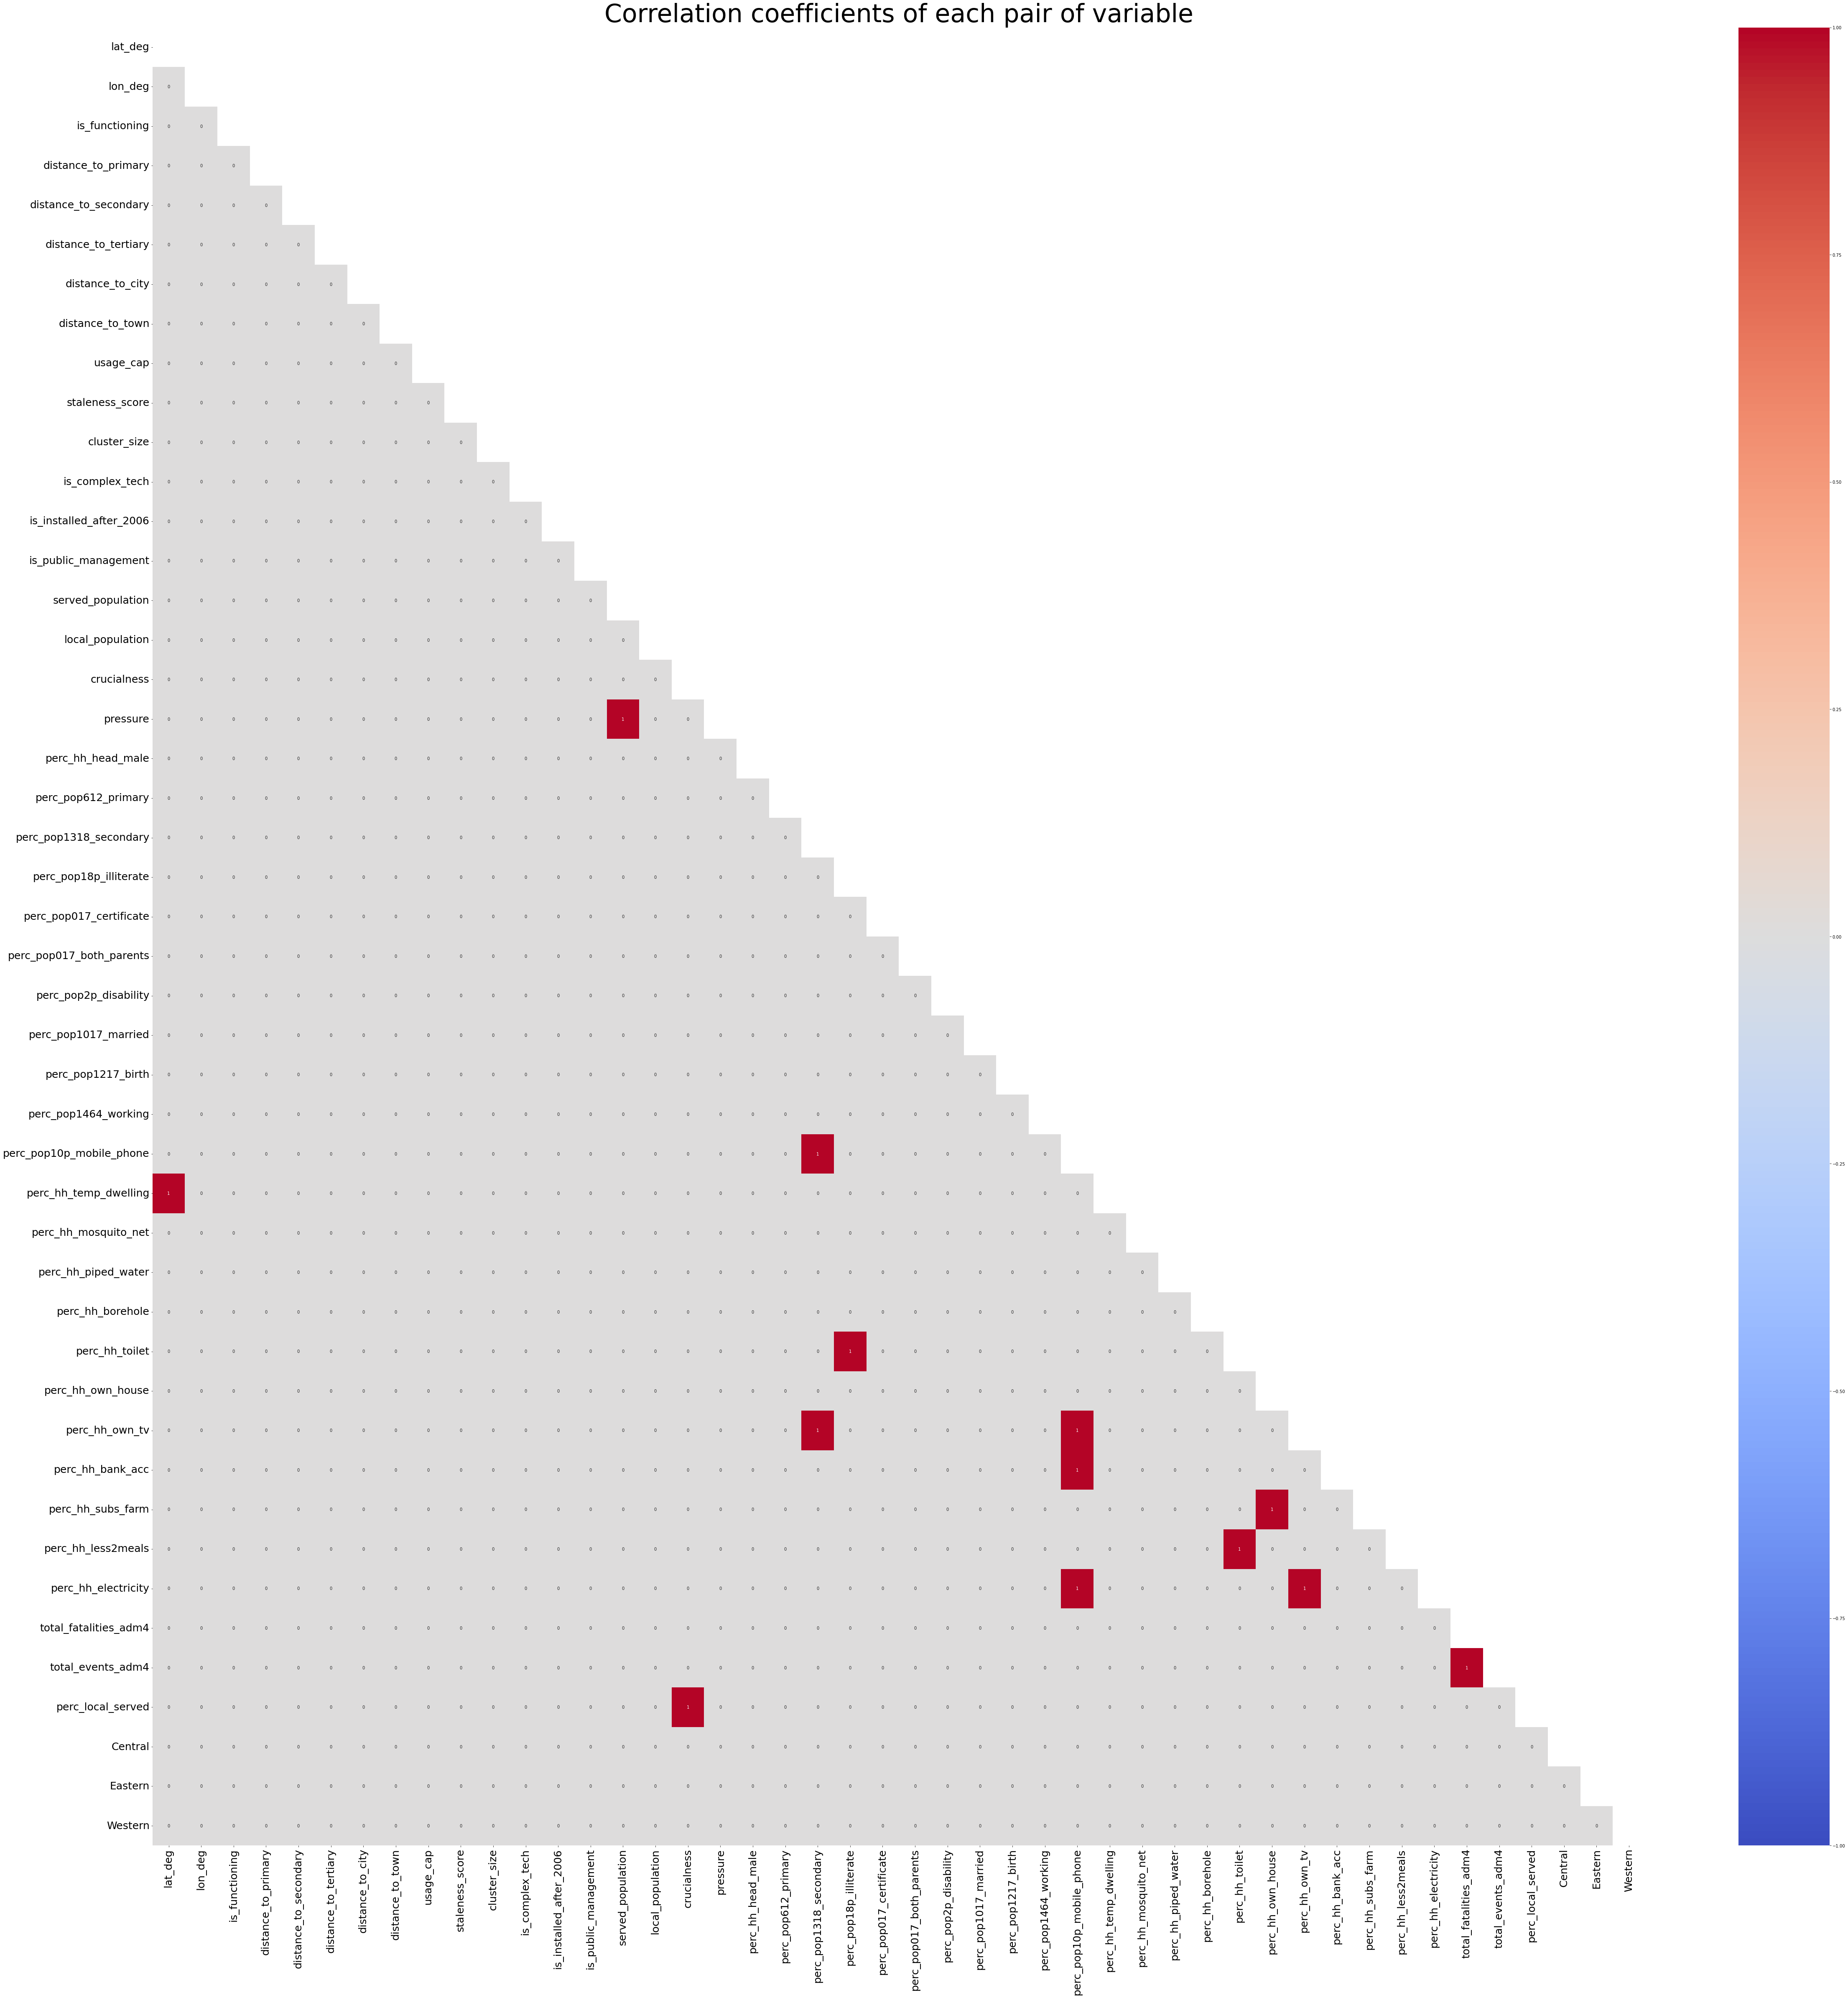

In [50]:
# see only highly positively correlated variables
plt.figure(figsize=(80,80))

#Applying heatmap correlations
sns.heatmap(master_df_region.corr()>=0.7, annot=True, mask=matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation coefficients of each pair of variable', size=60)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

We look at variables which have a correlation coefficient higher than 0.7.

- we do not drop `perc_local_served` yet although it is very similar to what `crucialness`. It is also closely related to `pressure` as it is trying to measure the same thing. We will see later how to deal with those.

- we drop mobile phone and TV ownership in favor of electricity access and secondary enrollment as we can represent the two former with the two latter. In addition, we believe that electricity is a better overall indicator of the development and wealth of a household and region. Secondary enrollment gives us a good representation of the education system in the region.

- we drop the illiteracy rate and an indicator for households eating enough (less than 2 meals a day or not) in favour of access to toilet. The reason is that we already have school enrollment which should tell us already about the education situation of the region. In addition, toilet access also seems a strong candidate for a development indicator.

- we keep both events and fatalities. It makes sense they are highly correlated but will wait for further to analyse to choose which one to discard.

- it seems that households at a certain latitude live more often in temporary dwellings we also refrain from dropping it just yet as we might not be using latitude in most models.

In [51]:
#drop columns from multicolinearity analysis
master_df_clean=master_df_region.drop(columns=['perc_hh_own_tv', 'perc_pop10p_mobile_phone', 'perc_pop18p_illiterate', 'perc_hh_less2meals'])

#check
master_df_clean.columns

Index(['wpdx_id', 'lat_deg', 'lon_deg', 'is_functioning', 'clean_adm1',
       'clean_adm2', 'clean_adm3', 'clean_adm4', 'distance_to_primary',
       'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
       'distance_to_town', 'usage_cap', 'staleness_score', 'cluster_size',
       'is_complex_tech', 'is_installed_after_2006', 'is_public_management',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'perc_hh_head_male', 'perc_pop612_primary', 'perc_pop1318_secondary',
       'perc_pop017_certificate', 'perc_pop017_both_parents',
       'perc_pop2p_disability', 'perc_pop1017_married', 'perc_pop1217_birth',
       'perc_pop1464_working', 'perc_hh_temp_dwelling', 'perc_hh_mosquito_net',
       'perc_hh_piped_water', 'perc_hh_borehole', 'perc_hh_toilet',
       'perc_hh_own_house', 'perc_hh_bank_acc', 'perc_hh_subs_farm',
       'perc_hh_electricity', 'total_fatalities_adm4', 'total_events_adm4',
       'perc_local_served', 'Central', 'Eas

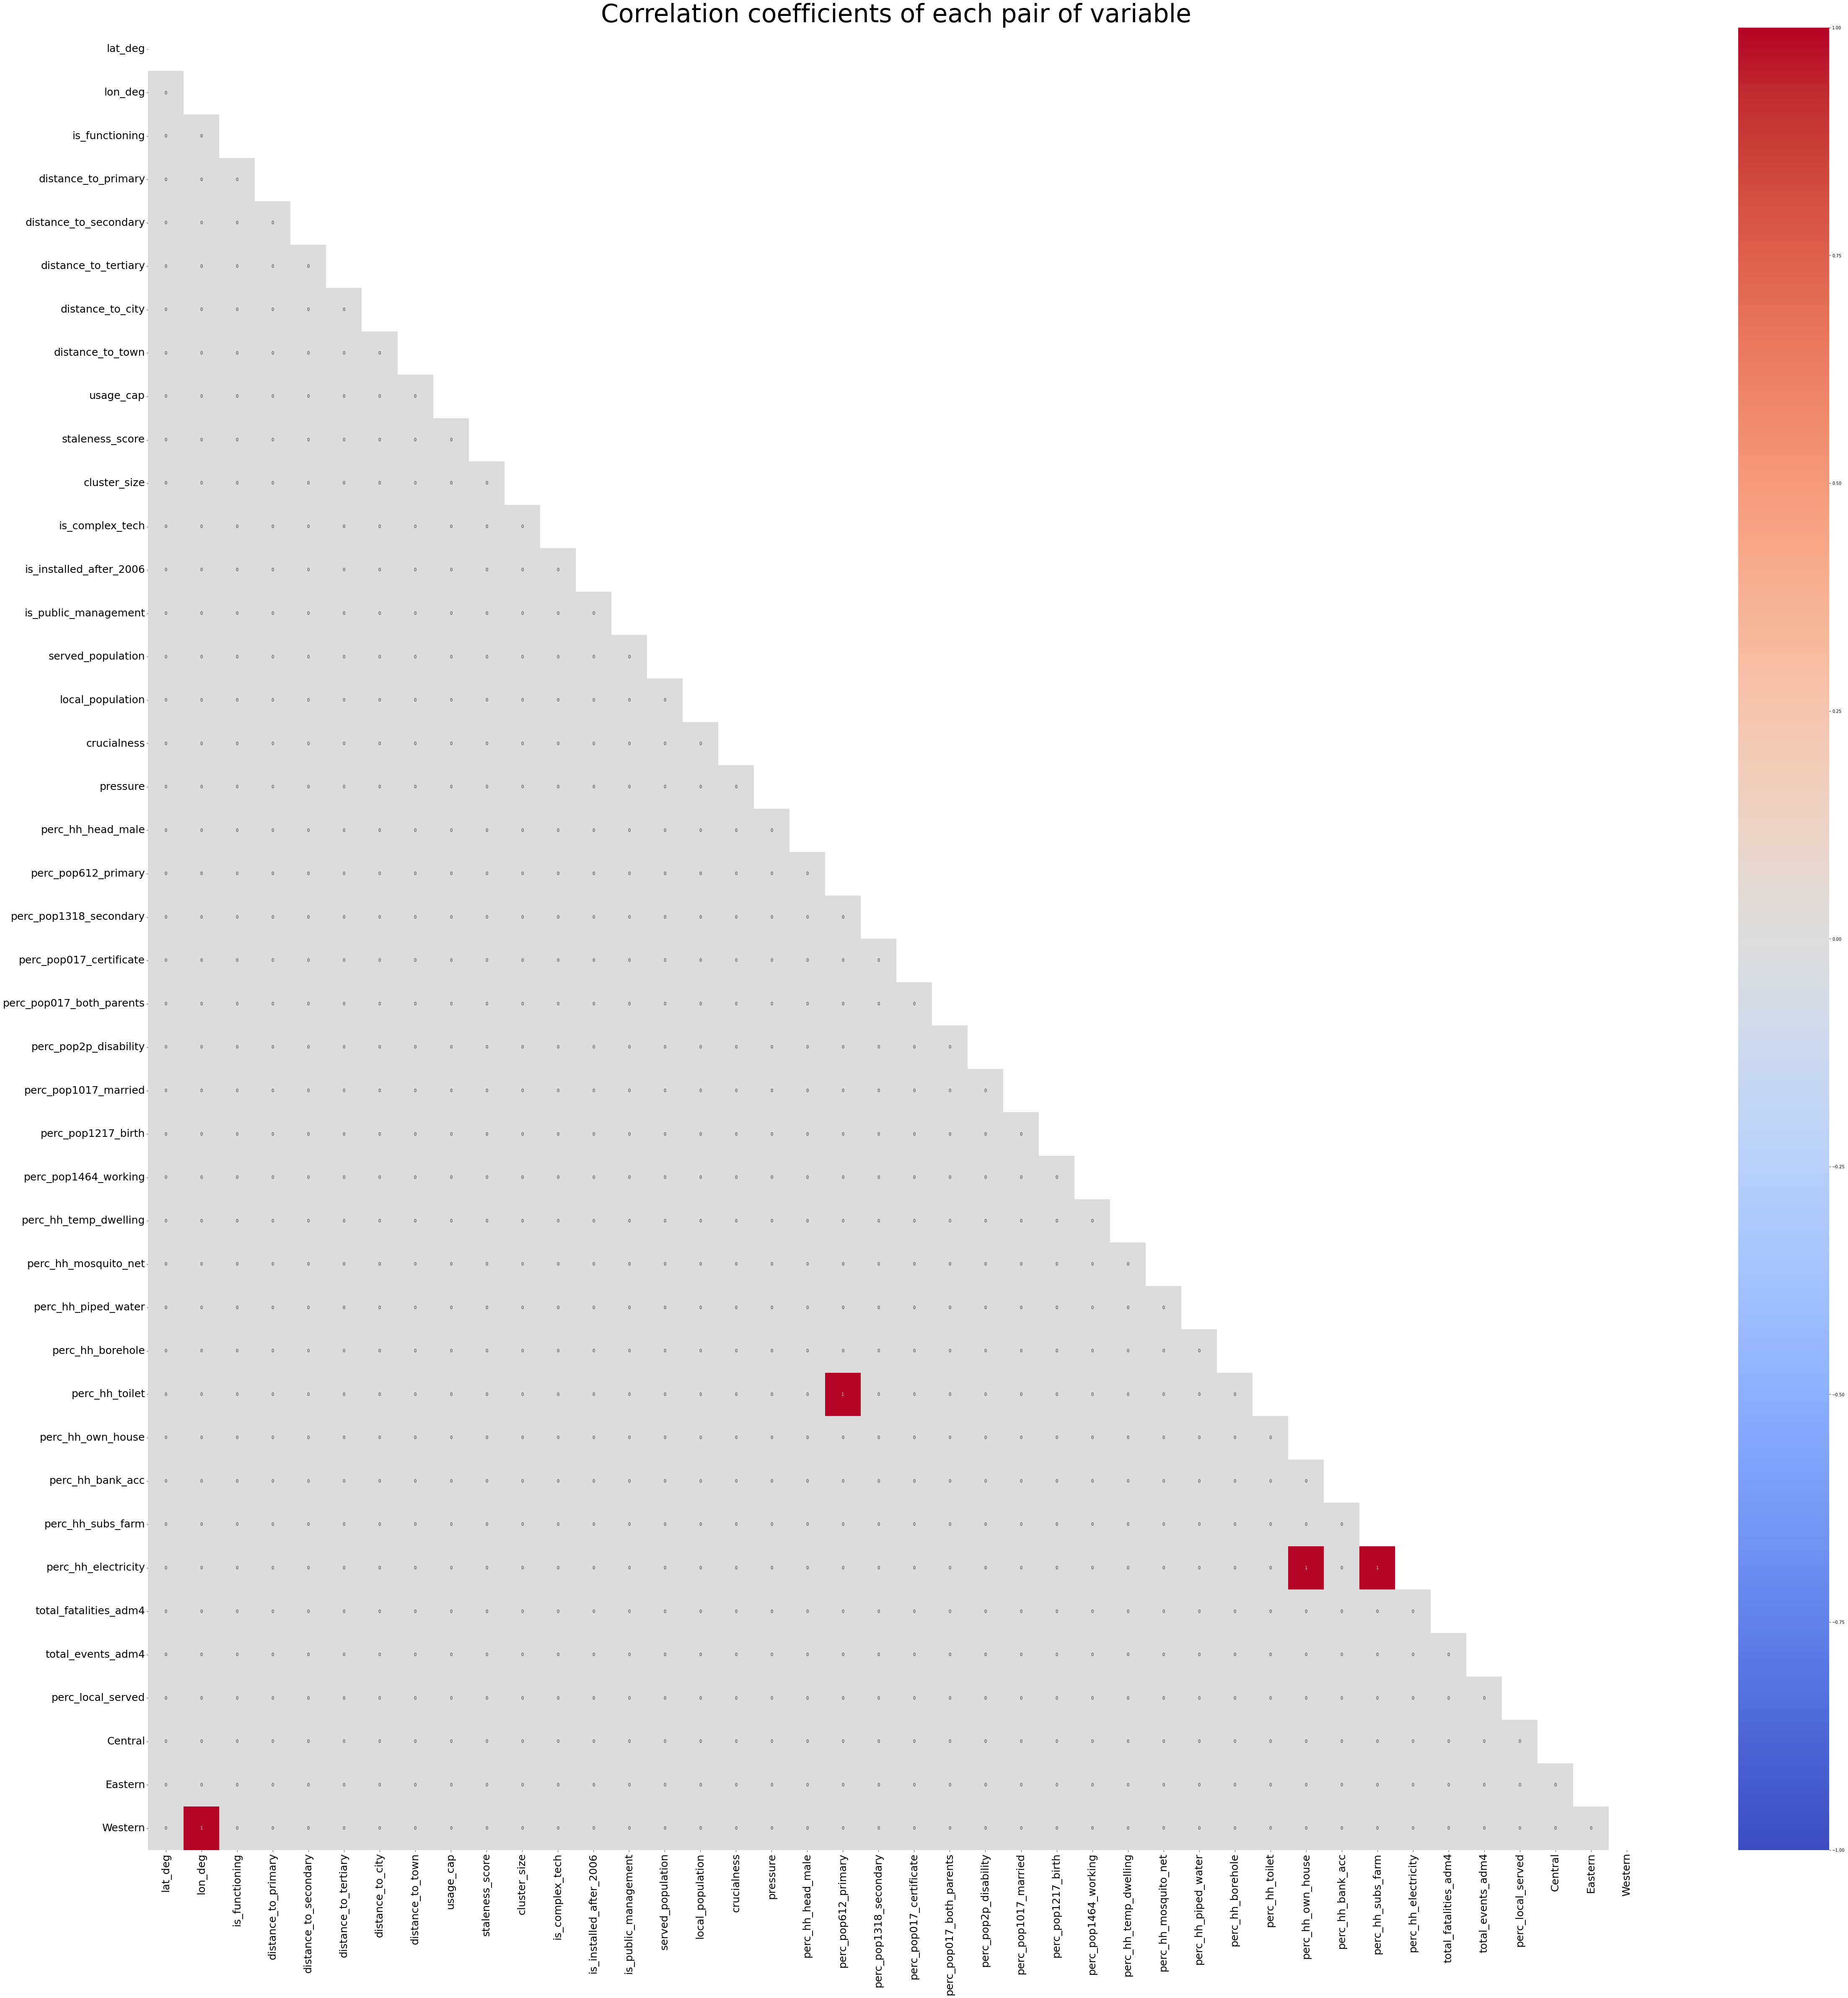

In [52]:
plt.figure(figsize=(80,80))

#Creating matrix of correlations between each pair of variables
matrix = np.triu(master_df_clean.corr())

#Applying heatmap correlations
sns.heatmap(master_df_clean.corr()<=-0.7, annot=True, mask=matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation coefficients of each pair of variable', size=60)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

We look at the variables which have a correlation coefficient larger than -0.8.
- we drop primary enrollment in favour of toilet access. We already have secondary enrollemnt to represent education level of a region.
- we drop subsistence farming in favour of electricity as we assume the latter is a better indicator for development 

In [53]:
#drop columns from multicolinearity analysis
master_df_clean=master_df_clean.drop(columns=['perc_pop612_primary', 'perc_hh_subs_farm'])

#check
master_df_clean.columns

Index(['wpdx_id', 'lat_deg', 'lon_deg', 'is_functioning', 'clean_adm1',
       'clean_adm2', 'clean_adm3', 'clean_adm4', 'distance_to_primary',
       'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
       'distance_to_town', 'usage_cap', 'staleness_score', 'cluster_size',
       'is_complex_tech', 'is_installed_after_2006', 'is_public_management',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'perc_hh_head_male', 'perc_pop1318_secondary',
       'perc_pop017_certificate', 'perc_pop017_both_parents',
       'perc_pop2p_disability', 'perc_pop1017_married', 'perc_pop1217_birth',
       'perc_pop1464_working', 'perc_hh_temp_dwelling', 'perc_hh_mosquito_net',
       'perc_hh_piped_water', 'perc_hh_borehole', 'perc_hh_toilet',
       'perc_hh_own_house', 'perc_hh_bank_acc', 'perc_hh_electricity',
       'total_fatalities_adm4', 'total_events_adm4', 'perc_local_served',
       'Central', 'Eastern', 'Western'],
      dtype='object')

# D. Linearity with outcome variable

In [54]:
#choose numeric columns
master_numeric=master_df_clean.select_dtypes(exclude='object')

In [55]:
#checking the correlation coefficient between explanatory and outcome variable
correl_loop(master_numeric, master_numeric['is_functioning'])

The correlation coefficient is -0.0628 with a p-value of 5.699349781172287e-94.
is_functioning is  weakly negatively correlated with lat_deg.
Statistically significant.
 -------------- 
The correlation coefficient is -0.0114 with a p-value of 0.0001992381833059013.
is_functioning is  weakly negatively correlated with lon_deg.
Statistically significant.
 -------------- 
The correlation coefficient is 1.0 with a p-value of 0.0.
is_functioning is  strongly positively correlated with is_functioning.
Statistically significant.
 -------------- 
The correlation coefficient is 0.0096 with a p-value of 0.0015987023671079207.
is_functioning is  weakly positively correlated with distance_to_primary.
Statistically significant.
 -------------- 
The correlation coefficient is -0.0188 with a p-value of 6.996259735674676e-10.
is_functioning is  weakly negatively correlated with distance_to_secondary.
Statistically significant.
 -------------- 
The correlation coefficient is -0.0082 with a p-value of 0

Our correlation coefficients tell us that toilet access, secondary enrollment, bank account ownership and the fact that the water point was installed after 2006 is strongly correlated (larger than 0.5) with the functioning of a water point.

On the other hand, the percentage of households headed by a male in a region, cluster size, proportion of population in employment and fatalities in a region are not correlated with our outcome and may be dropped later down.

The function above loops over all variables in X and computes its correlation with y.
 
The hypotheses is:

$ 𝐻_0 $ : The variable X and y are not related (correlated), they are independent.

$ 𝐻_1 $ : X and y are related and not independent.

The output includes:

**Pearson correlation coefficient (PCC)**


* ex: If the PCC is 0.5 between x and y, that means that an increase of one unit in x is associated with an increase of 0.5 units for y.
 
 
**P-value**


* Represents the probability that we see our dataset, assuming $H_0$ is true.
     


**Positive or negative correlation between the two variables**


* $ -1 < PCC < -0.5 $ strong negative correlation
* $ -0.5 < PCC < 0 $ weak negative correlation
* $ 0 < PCC < 0.5 $ weak positive correlation
* $ 0.5 < PCC < 1 $ strong positive correlation


**Statistical significance of the PCC**

* If the $ p-value < 0.05 $  (5% significance level), then we can reject $ H_0 $. This means that the value we are testing for (PCC in this case) is statistically significant (**SS**) or not (**NSS**).

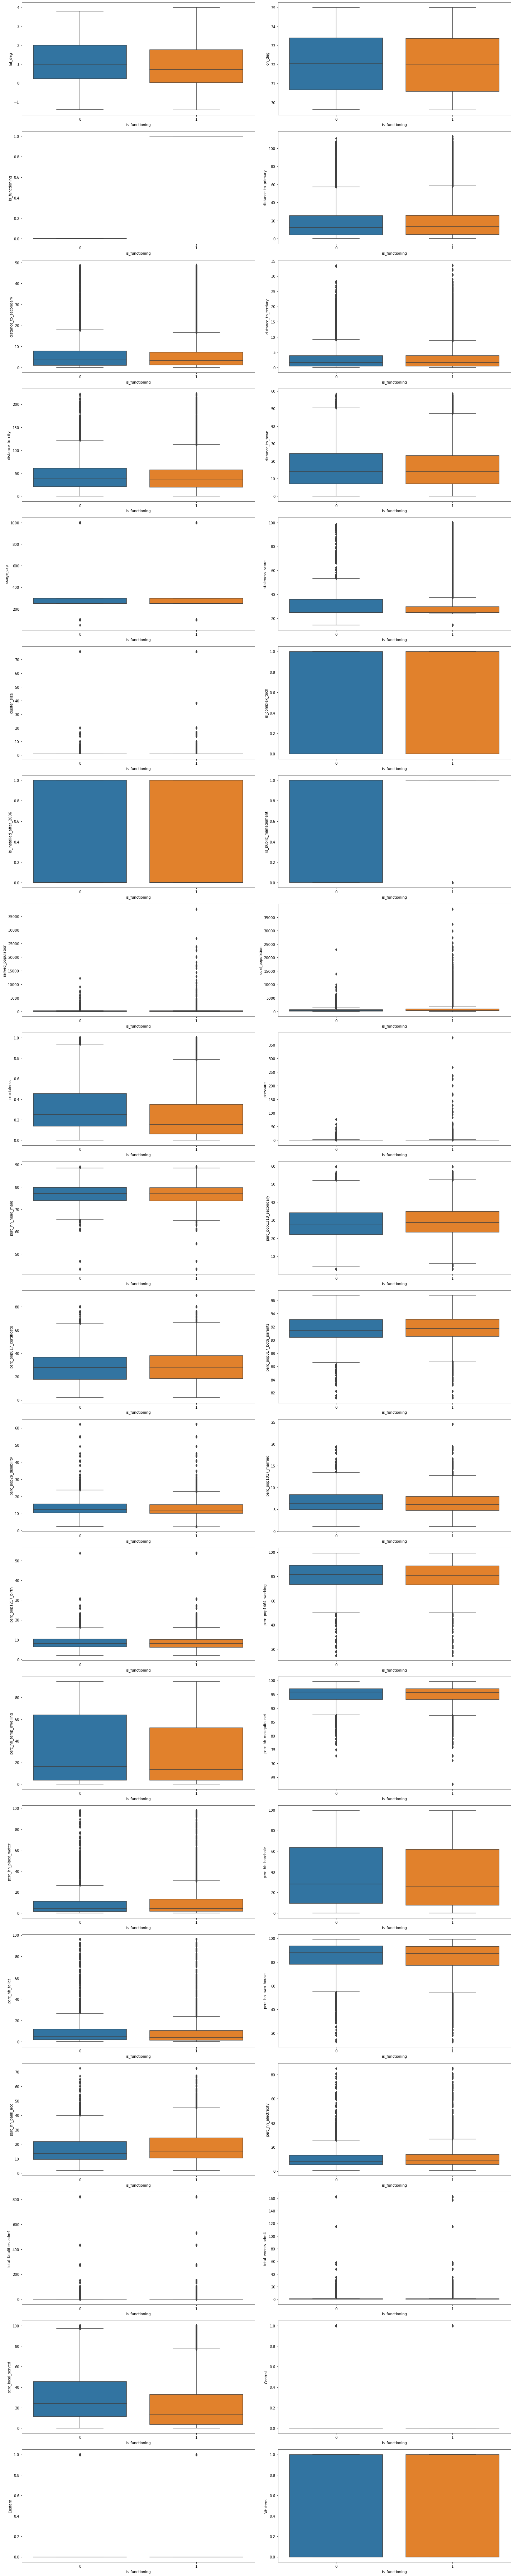

In [56]:
#visualising linear relationship between all variables and our outcome variable
box_loop(master_numeric, master_numeric['is_functioning'])

The box plots do not tell us much more than the correlation coefficients from above apart from the fact that it sems that the majority of non-functioning water points are managed by a public entity.

# E. Variance

Knowint the variance of variables tells us whether they will be useful in our model later on. If variance is low then it won't have any variation to help us understand our outcome variable.

In [57]:
#variance of numeric columns
master_numeric.var()

lat_deg                     1.536226e+00
lon_deg                     2.262151e+00
is_functioning              1.574489e-01
distance_to_primary         2.662696e+02
distance_to_secondary       4.033868e+01
distance_to_tertiary        1.264459e+01
distance_to_city            9.342788e+02
distance_to_town            1.369816e+02
usage_cap                   9.769495e+03
staleness_score             3.278969e+02
cluster_size                5.149126e+00
is_complex_tech             2.349365e-01
is_installed_after_2006     2.280490e-01
is_public_management        1.879953e-01
served_population           2.023933e+05
local_population            1.085727e+06
crucialness                 6.836902e-02
pressure                    1.010802e+01
perc_hh_head_male           2.194791e+01
perc_pop1318_secondary      8.482010e+01
perc_pop017_certificate     1.790029e+02
perc_pop017_both_parents    4.882530e+00
perc_pop2p_disability       2.258313e+01
perc_pop1017_married        6.848753e+00
perc_pop1217_bir

We need to scale our data as all columns have different scales and measurements

In [58]:
# scaling the data
min_max = MinMaxScaler()
scaled_data = min_max.fit_transform(master_numeric)

#make a dataframe
master_numeric_scaled = pd.DataFrame(data=scaled_data, columns=master_numeric.columns)

#check variance of scaled numeric columns
master_numeric_scaled.var()

lat_deg                     0.052166
lon_deg                     0.078247
is_functioning              0.157449
distance_to_primary         0.020754
distance_to_secondary       0.016938
distance_to_tertiary        0.011199
distance_to_city            0.018849
distance_to_town            0.040169
usage_cap                   0.010825
staleness_score             0.044707
cluster_size                0.000915
is_complex_tech             0.234937
is_installed_after_2006     0.228049
is_public_management        0.187995
served_population           0.000143
local_population            0.000749
crucialness                 0.068380
pressure                    0.000071
perc_hh_head_male           0.010445
perc_pop1318_secondary      0.026492
perc_pop017_certificate     0.023162
perc_pop017_both_parents    0.020269
perc_pop2p_disability       0.006311
perc_pop1017_married        0.012523
perc_pop1217_birth          0.004908
perc_pop1464_working        0.019901
perc_hh_temp_dwelling       0.098507
p

In [59]:
# Instantiate  VarianceThreshold and set threshold for the variance
vt = VarianceThreshold(threshold=0.0005)

# Fit the data and calculate the variances per column
vt.fit(master_numeric_scaled)

VarianceThreshold(threshold=0.0005)

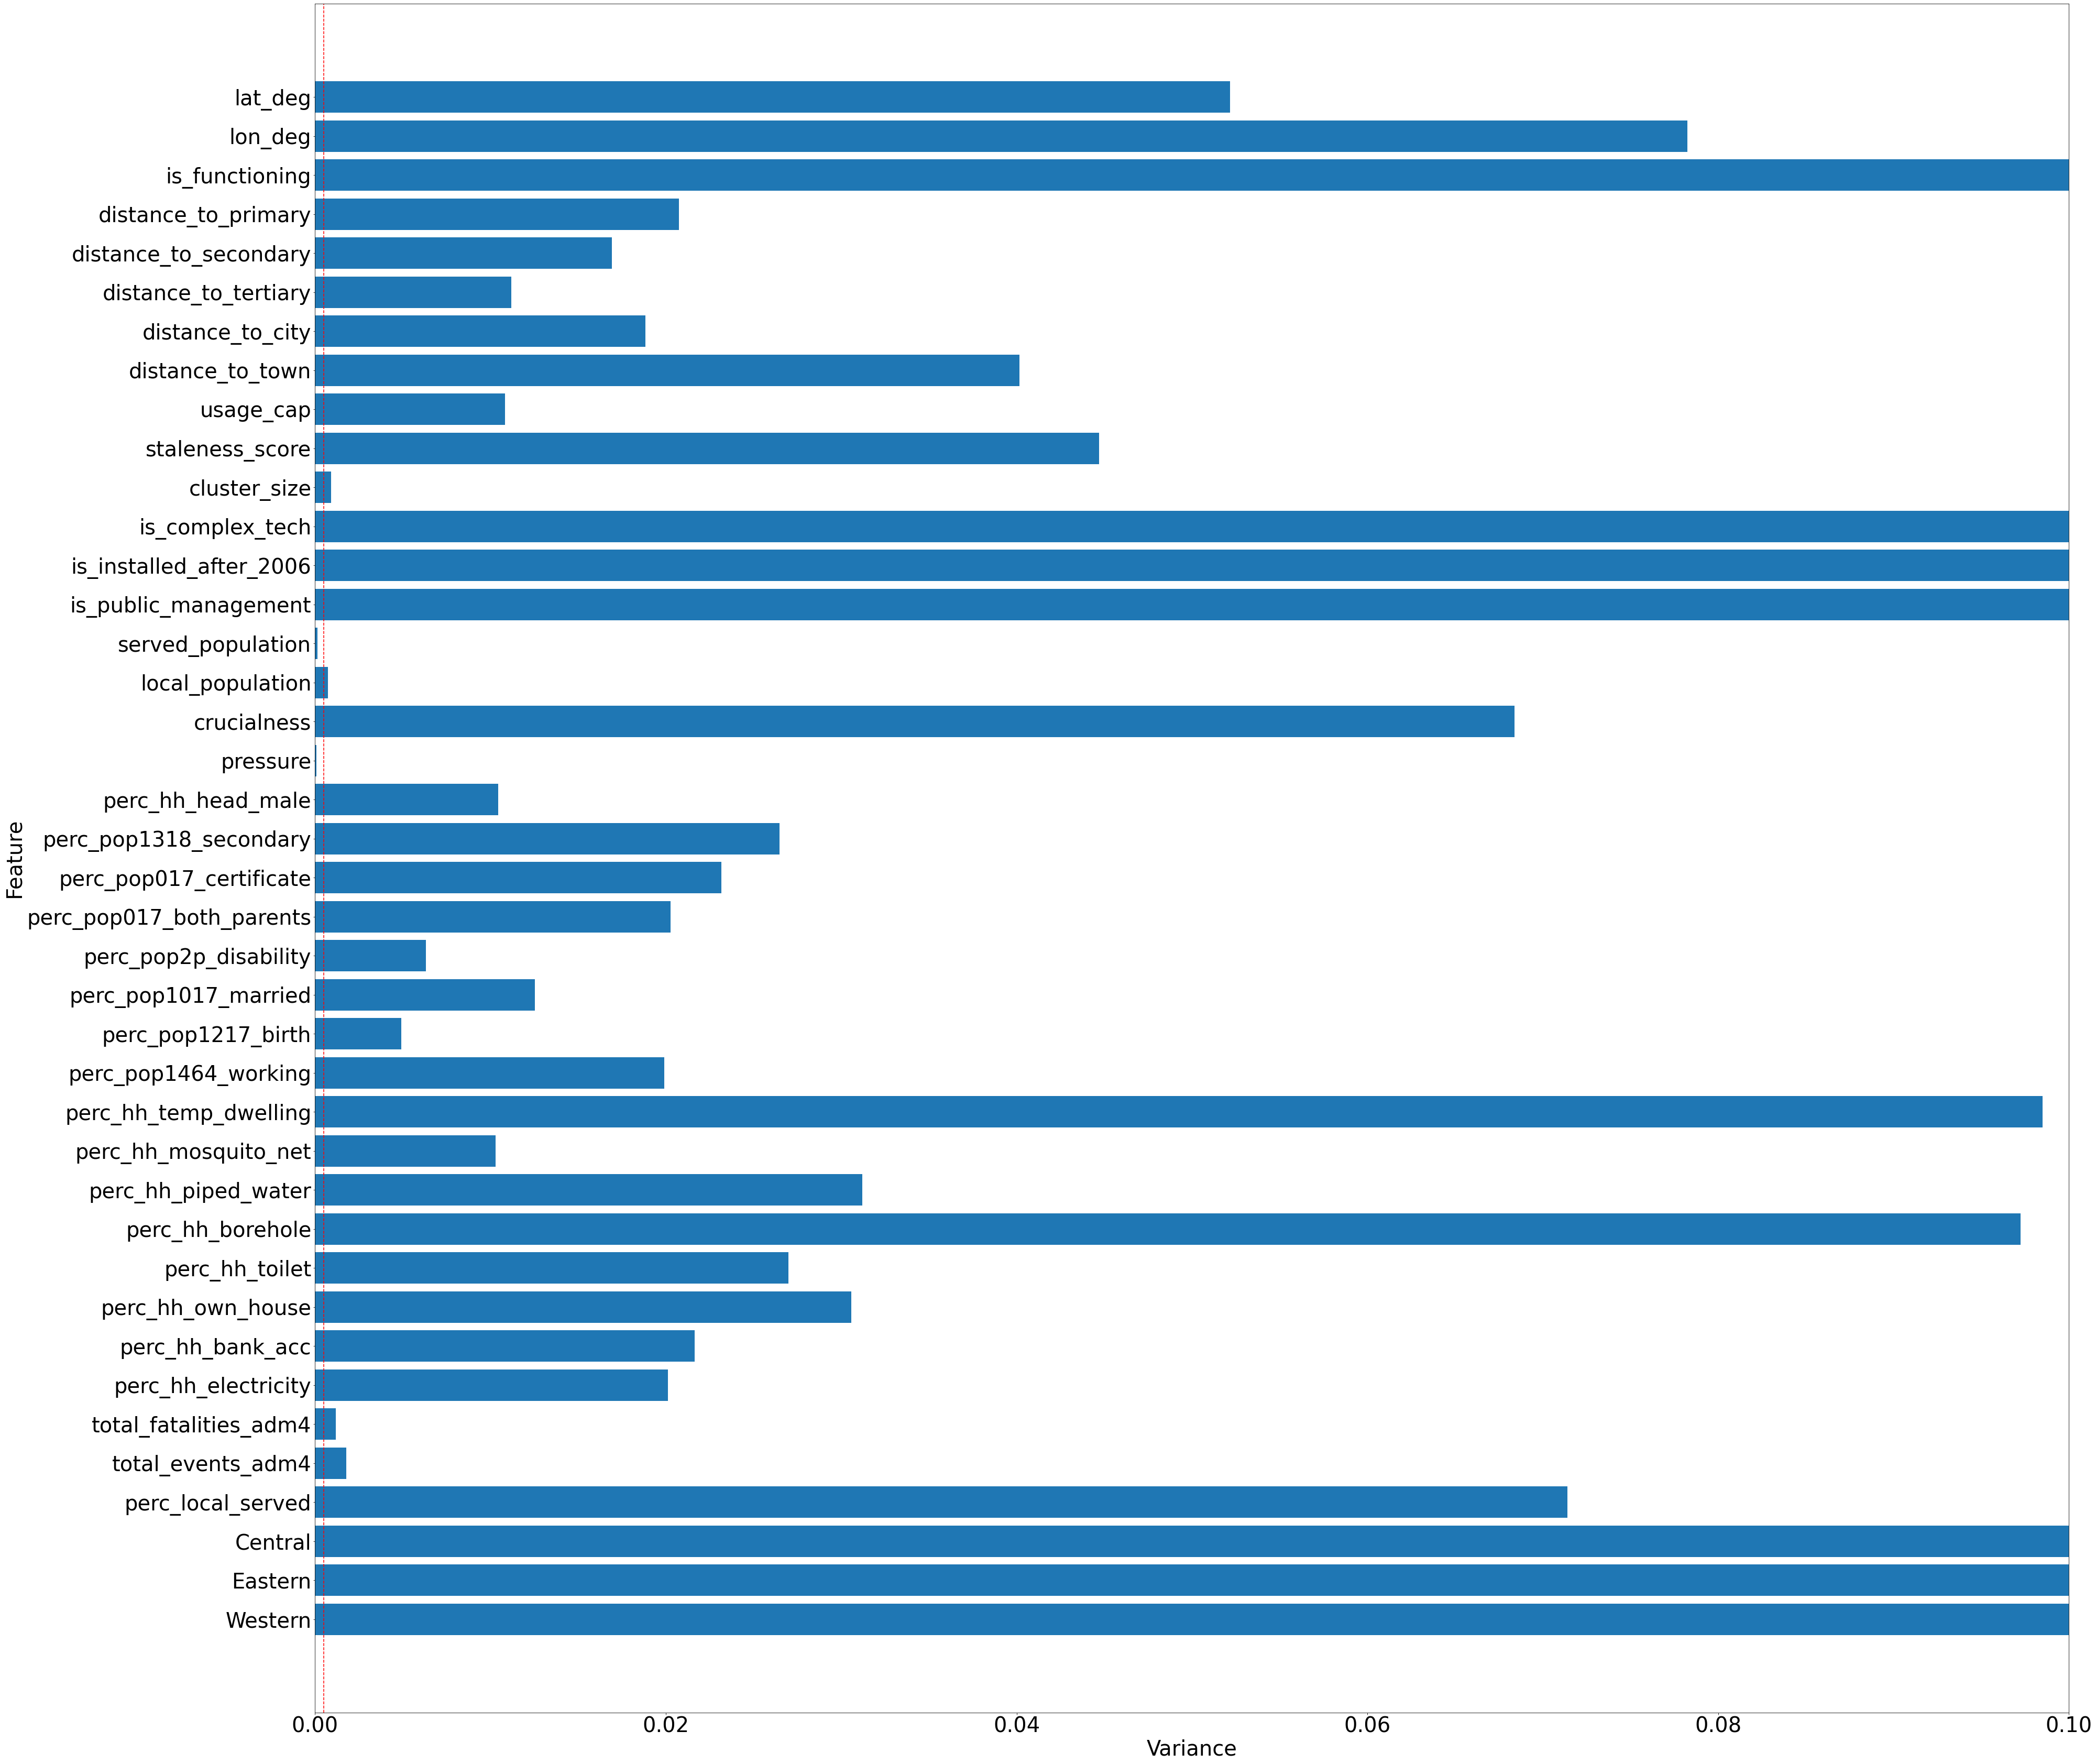

In [60]:
#the variances per column
column_variances = vt.variances_

# Plot including the threshold
plt.figure(figsize=(60,60))
plt.barh(np.flip(master_numeric_scaled.columns), np.flip(column_variances))
plt.xlabel('Variance', size=40)
plt.ylabel('Feature', size=40)
plt.axvline(0.0005, color='red', linestyle='--')
plt.xticks(size=40)
plt.yticks(size=40)
plt.xlim(0,0.1)
plt.show()

Our outcome variable (`is_functioning`) has high variance, which is a very good sign.

The technology of the water point, the installation year and the management entity of the water point have especially high variances.

On the other hand, cluster size, served population, local population, fatalities and pressure all have low variances.

Given the analysis on correlation and variances we choose to drop:

- `cluster_size` due to its low variance and weak correlation with the outcome variable

- `served_population`, `local_population` and `pressure` as they have low variances and are captured by `perc_local_served` created by ourselves.

- `total_fatalities_adm4` because of its variance, low correlation and multicollinearity with `total_events_adm4`.

In [61]:
# #drop columns
master_df_clean=master_df_clean.drop(columns=['cluster_size', 'served_population', 'local_population', 'pressure', 'total_fatalities_adm4'])

# #check
master_df_clean.columns

Index(['wpdx_id', 'lat_deg', 'lon_deg', 'is_functioning', 'clean_adm1',
       'clean_adm2', 'clean_adm3', 'clean_adm4', 'distance_to_primary',
       'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
       'distance_to_town', 'usage_cap', 'staleness_score', 'is_complex_tech',
       'is_installed_after_2006', 'is_public_management', 'crucialness',
       'perc_hh_head_male', 'perc_pop1318_secondary',
       'perc_pop017_certificate', 'perc_pop017_both_parents',
       'perc_pop2p_disability', 'perc_pop1017_married', 'perc_pop1217_birth',
       'perc_pop1464_working', 'perc_hh_temp_dwelling', 'perc_hh_mosquito_net',
       'perc_hh_piped_water', 'perc_hh_borehole', 'perc_hh_toilet',
       'perc_hh_own_house', 'perc_hh_bank_acc', 'perc_hh_electricity',
       'total_events_adm4', 'perc_local_served', 'Central', 'Eastern',
       'Western'],
      dtype='object')

In [62]:
#rename columns
master_df_clean=master_df_clean.rename(columns={'Central': 'is_central', 'Western': 'is_western', 'Eastern': 'is_eastern'})

#check
master_df_clean.columns

Index(['wpdx_id', 'lat_deg', 'lon_deg', 'is_functioning', 'clean_adm1',
       'clean_adm2', 'clean_adm3', 'clean_adm4', 'distance_to_primary',
       'distance_to_secondary', 'distance_to_tertiary', 'distance_to_city',
       'distance_to_town', 'usage_cap', 'staleness_score', 'is_complex_tech',
       'is_installed_after_2006', 'is_public_management', 'crucialness',
       'perc_hh_head_male', 'perc_pop1318_secondary',
       'perc_pop017_certificate', 'perc_pop017_both_parents',
       'perc_pop2p_disability', 'perc_pop1017_married', 'perc_pop1217_birth',
       'perc_pop1464_working', 'perc_hh_temp_dwelling', 'perc_hh_mosquito_net',
       'perc_hh_piped_water', 'perc_hh_borehole', 'perc_hh_toilet',
       'perc_hh_own_house', 'perc_hh_bank_acc', 'perc_hh_electricity',
       'total_events_adm4', 'perc_local_served', 'is_central', 'is_eastern',
       'is_western'],
      dtype='object')

# F. Final feature selection

Finally, we get rid of columns which we feel represent redundant information access to piped water and borehole is very similar to what we are trying to predict. We are wary this might introduce bias in our estimators and we decide to discard these two columns. We also get ride of the name of the regions and the id number  as these are categorical variables and we already have a column for adm1.

In [63]:
# #drop columns
master_df_clean_comparison=master_df_clean.drop(columns=['perc_hh_piped_water', 'perc_hh_borehole', 'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4', 'staleness_score'])

# #check
master_df_clean_comparison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107184 entries, 0 to 108905
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   wpdx_id                   106307 non-null  object 
 1   lat_deg                   107184 non-null  float64
 2   lon_deg                   107184 non-null  float64
 3   is_functioning            107184 non-null  int64  
 4   distance_to_primary       107184 non-null  float64
 5   distance_to_secondary     107184 non-null  float64
 6   distance_to_tertiary      107184 non-null  float64
 7   distance_to_city          107184 non-null  float64
 8   distance_to_town          107184 non-null  float64
 9   usage_cap                 107184 non-null  float64
 10  is_complex_tech           107184 non-null  int64  
 11  is_installed_after_2006   107184 non-null  int64  
 12  is_public_management      107184 non-null  int64  
 13  crucialness               107184 non-null  f

In [64]:
#export comparison dataset
master_df_clean_comparison.to_csv(data_filepath + 'master_comparison_df.csv')

In [65]:
# #drop columns
master_df_clean=master_df_clean_comparison.drop(columns=['wpdx_id'])

# #check
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107184 entries, 0 to 108905
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lat_deg                   107184 non-null  float64
 1   lon_deg                   107184 non-null  float64
 2   is_functioning            107184 non-null  int64  
 3   distance_to_primary       107184 non-null  float64
 4   distance_to_secondary     107184 non-null  float64
 5   distance_to_tertiary      107184 non-null  float64
 6   distance_to_city          107184 non-null  float64
 7   distance_to_town          107184 non-null  float64
 8   usage_cap                 107184 non-null  float64
 9   is_complex_tech           107184 non-null  int64  
 10  is_installed_after_2006   107184 non-null  int64  
 11  is_public_management      107184 non-null  int64  
 12  crucialness               107184 non-null  float64
 13  perc_hh_head_male         107184 non-null  f


We have dropped a few columns which were not correlated with our outcome variable, had low variances or had high multicollienarity metrics with other explanatory variables. We have also gotten rid or transformed (through dummies) categorical variables. Our dataset is now ready to be used in models.

In [66]:
#export new dataset
master_df_clean.to_csv(data_filepath + 'master_modelling_df.csv')

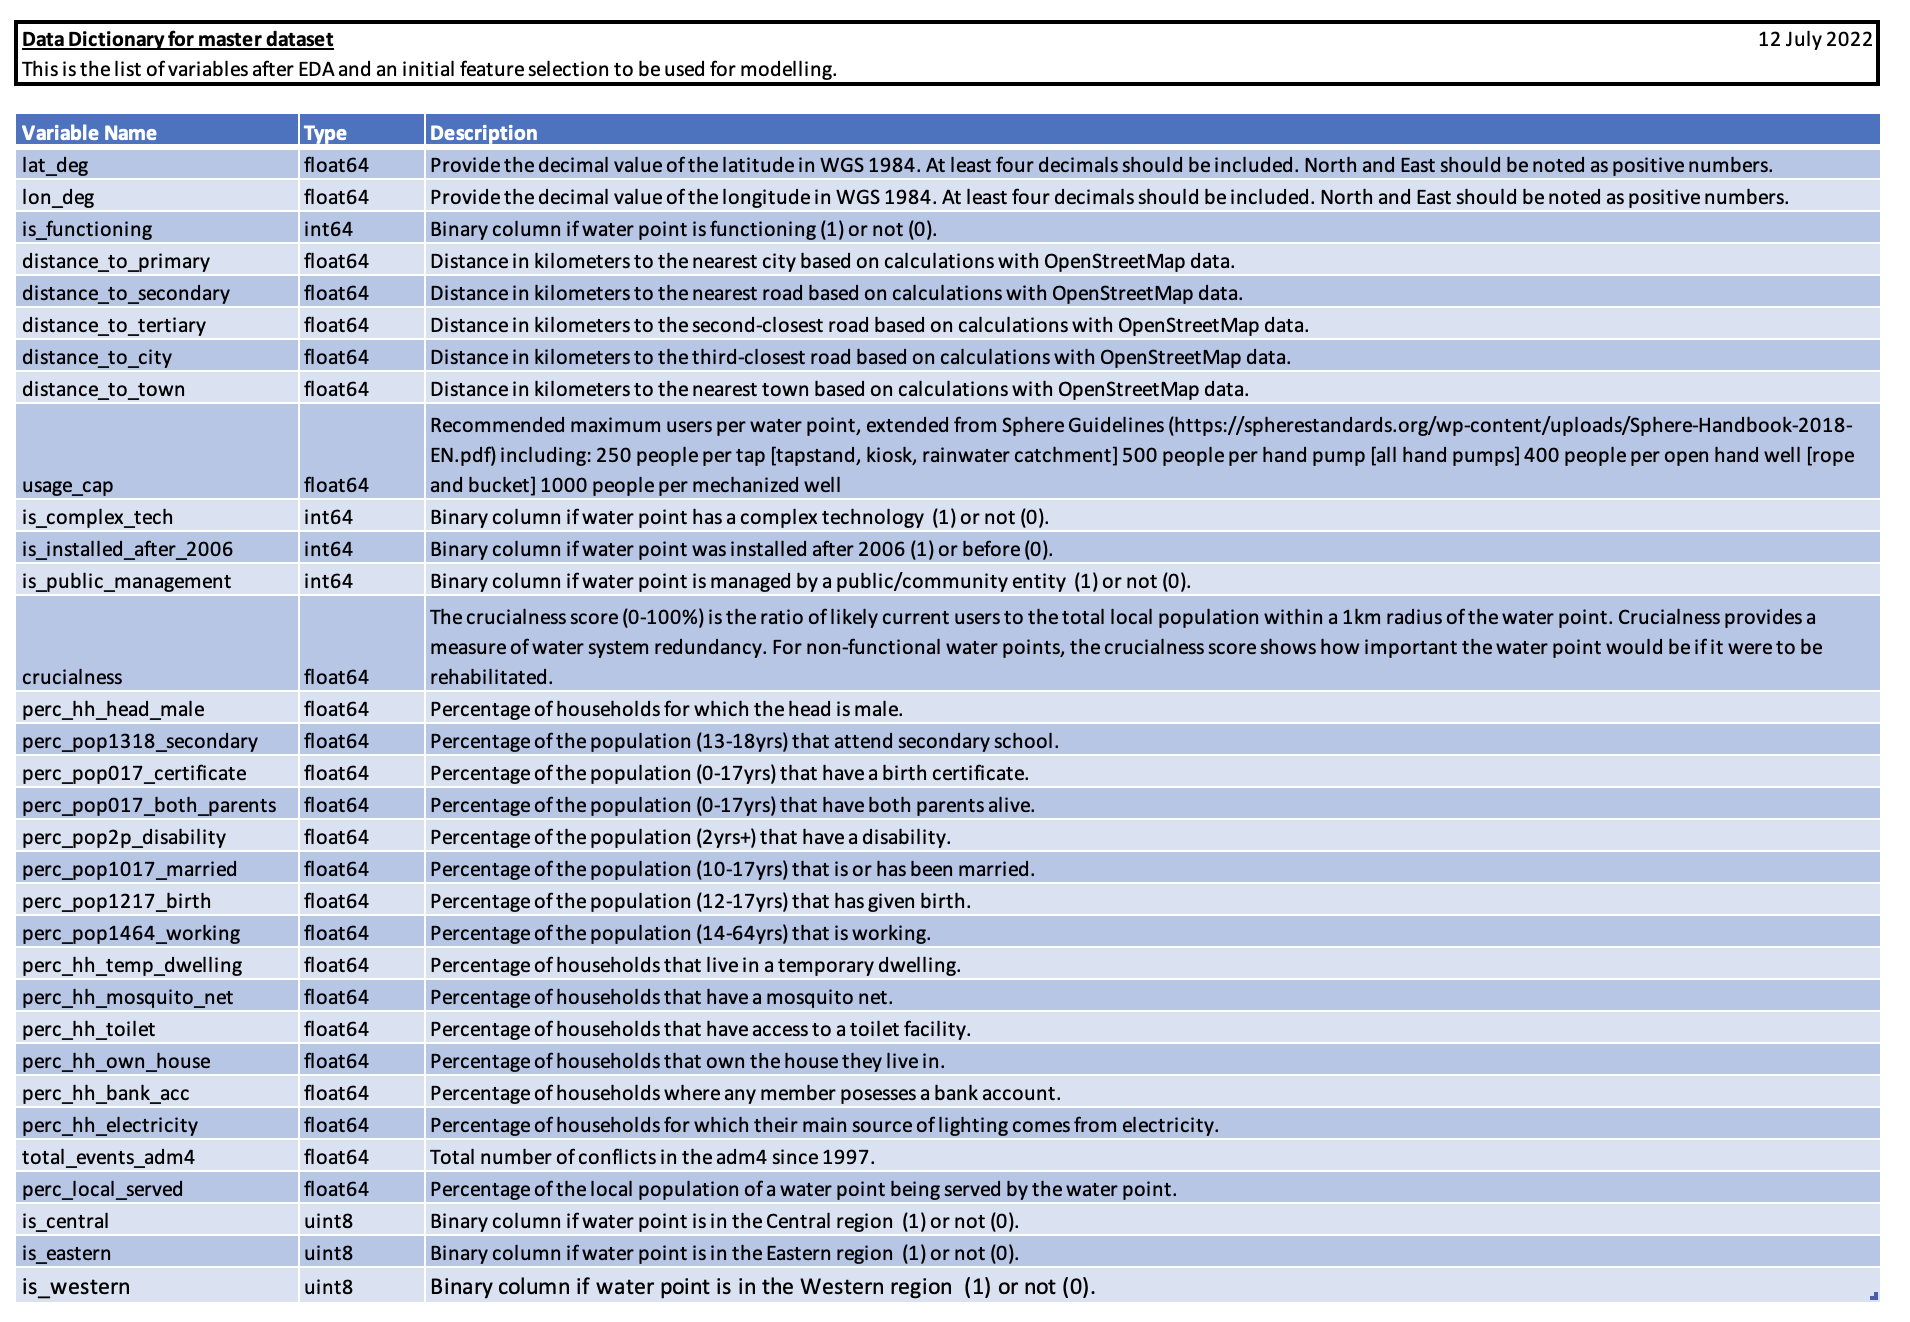

In [67]:
#data dictionary
Image(dictionary_filepath+"5-Modelling-Data-Dictionary.png")

# G. Hypotheses

Below, we explain our expectations. How do we expect our features to impact our outcome variable: the functionality of a water point?

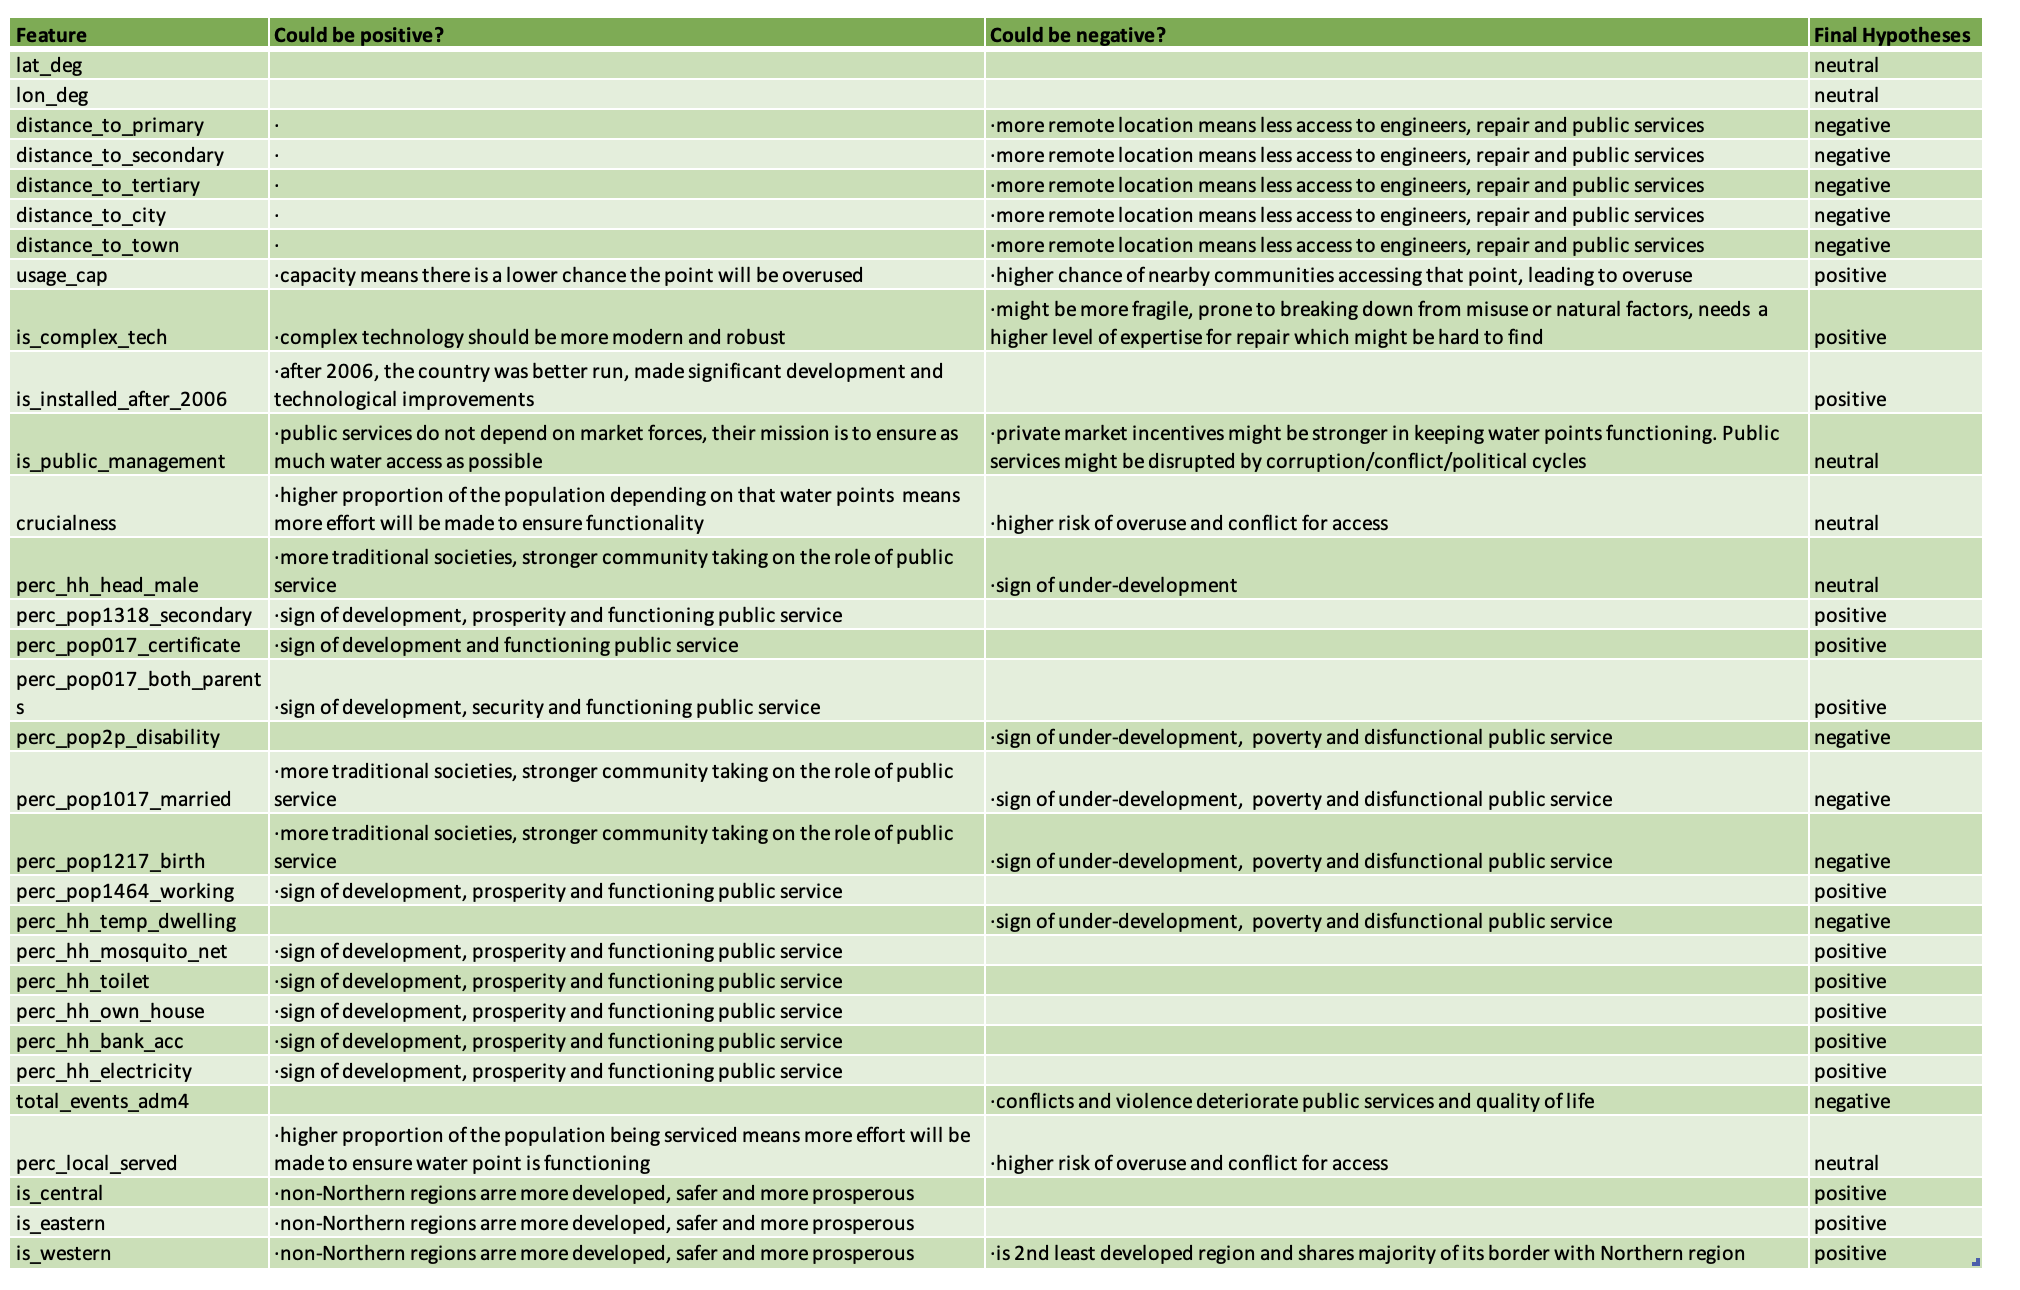

In [68]:
#hypotheses table
Image(dictionary_filepath+"6-Hypotheses.png")

# H. Output tables for visualisation

In [69]:
#separate tables by different regional levels
tableau_adm1_df = (master_df.groupby('clean_adm1').mean())
tableau_adm2_df = master_df.groupby('clean_adm2').mean()
tableau_adm3_df = master_df.groupby('clean_adm3').mean()
tableau_adm4_df = master_df.groupby('clean_adm4').mean()

#list of dataframes
dataframes = [tableau_adm1_df, tableau_adm2_df, tableau_adm3_df, tableau_adm4_df]

In [70]:
#making regions into a column
for df in dataframes:
    df.reset_index(inplace=True)

In [71]:
#make column names upper case for tableau joining with shapefile
tableau_adm1_df['clean_adm1'] = tableau_adm1_df['clean_adm1'].str.upper()
tableau_adm2_df['clean_adm2'] = tableau_adm2_df['clean_adm2'].str.upper()
tableau_adm3_df['clean_adm3'] = tableau_adm3_df['clean_adm3'].str.upper()
tableau_adm4_df['clean_adm4'] = tableau_adm4_df['clean_adm4'].str.upper()

In [72]:
names = ['tableau_adm1_df', 'tableau_adm2_df', 'tableau_adm3_df', 'tableau_adm4_df']

# export to csv
for df, name in zip(dataframes, names):
    df.to_csv(f"{data_filepath}{name}.csv")

In [73]:
# get individual water points
tableau_wpd_df = master_df.groupby(['wpdx_id', 'clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4']).mean()

#making regions into a column
tableau_wpd_df.reset_index(inplace=True)

#region colums upper case
for col in['clean_adm1', 'clean_adm2', 'clean_adm3', 'clean_adm4']:
    tableau_wpd_df[col] = tableau_wpd_df[col].str.upper()

#export dataset
tableau_wpd_df.to_csv(f"{data_filepath}tableau_wpd_df.csv")